<h1>I. Importing library and dataset 

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings   
import time
import matplotlib.pyplot as plt
import logging
warnings.filterwarnings("ignore")
lgb_logger = logging.getLogger("lightgbm")
lgb_logger.setLevel(logging.ERROR)

In [13]:
train = pd.read_csv(r"C:\Users\PC\Downloads\OneDrive_2_1-8-2025\CSV Files\Training and Testing Sets\UNSW_NB15_training-set.csv")
test = pd.read_csv(r"C:\Users\PC\Downloads\OneDrive_2_1-8-2025\CSV Files\Training and Testing Sets\UNSW_NB15_testing-set.csv")

In [14]:
train

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0            1  0.121478   tcp       -   FIN      6      4     258     172   
1            2  0.649902   tcp       -   FIN     14     38     734   42014   
2            3  1.623129   tcp       -   FIN      8     16     364   13186   
3            4  1.681642   tcp     ftp   FIN     12     12     628     770   
4            5  0.449454   tcp       -   FIN     10      6     534     268   
...        ...       ...   ...     ...   ...    ...    ...     ...     ...   
175336  175337  0.000009   udp     dns   INT      2      0     114       0   
175337  175338  0.505762   tcp       -   FIN     10      8     620     354   
175338  175339  0.000009   udp     dns   INT      2      0     114       0   
175339  175340  0.000009   udp     dns   INT      2      0     114       0   
175340  175341  0.000009   udp     dns   INT      2      0     114       0   

                 rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0           74.087490  ...                 1               1             0   
1           78.473372  ...                 1               2             0   
2           14.170161  ...                 1               3             0   
3           13.677108  ...                 1               3             1   
4           33.373826  ...                 1              40             0   
...               ...  ...               ...             ...           ...   
175336  111111.107200  ...                13              24             0   
175337      33.612649  ...                 1               2             0   
175338  111111.107200  ...                 3              13             0   
175339  111111.107200  ...                14              30             0   
175340  111111.107200  ...                16              30             0   

        ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0                0                 0           1           1                0   
1                0                 0           1           6                0   
2                0                 0           2           6                0   
3                1                 0           2           1                0   
4                0                 0           2          39                0   
...            ...               ...         ...         ...              ...   
175336           0                 0          24          24                0   
175337           0                 0           1           1                0   
175338           0                 0           3          12                0   
175339           0                 0          30          30                0   
175340           0                 0          30          30                0   

        attack_cat  label  
0           Normal      0  
1           Normal      0  
2           Normal      0  
3           Normal      0  
4           Normal      0  
...            ...    ...  
175336     Generic      1  
175337   Shellcode      1  
175338     Generic      1  
175339     Generic      1  
175340     Generic      1  

[175341 rows x 45 columns]

In [15]:
test

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.000011   udp       -   INT      2      0     496       0   
1          2  0.000008   udp       -   INT      2      0    1762       0   
2          3  0.000005   udp       -   INT      2      0    1068       0   
3          4  0.000006   udp       -   INT      2      0     900       0   
4          5  0.000010   udp       -   INT      2      0    2126       0   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0       90909.090200  ...                 1               2             0   
1      125000.000300  ...                 1               2             0   
2      200000.005100  ...                 1               3             0   
3      166666.660800  ...                 1               3             0   
4      100000.002500  ...                 1               3             0   
...              ...  ...               ...             ...           ...   
82327  200000.005100  ...                 1               2             0   
82328      24.410067  ...                 1               1             0   
82329       0.000000  ...                 1               1             0   
82330       0.000000  ...                 1               1             0   
82331  111111.107200  ...                 1               1             0   

       ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0               0                 0           1           2                0   
1               0                 0           1           2                0   
2               0                 0           1           3                0   
3               0                 0           2           3                0   
4               0                 0           2           3                0   
...           ...               ...         ...         ...              ...   
82327           0                 0           2           1                0   
82328           0                 0           3           2                0   
82329           0                 0           1           1                1   
82330           0                 0           1           1                1   
82331           0                 0           1           1                0   

       attack_cat  label  
0          Normal      0  
1          Normal      0  
2          Normal      0  
3          Normal      0  
4          Normal      0  
...           ...    ...  
82327      Normal      0  
82328      Normal      0  
82329      Normal      0  
82330      Normal      0  
82331      Normal      0  

[82332 rows x 45 columns]

<h1>II. EDA

The EDA section is directly replicated from the research paper, presenting the distribution of various attack categories in the training and testing datasets.

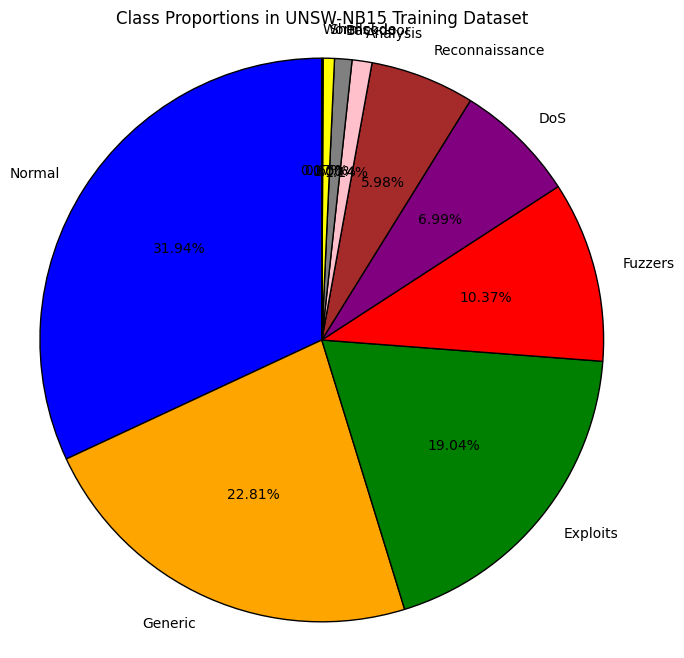

In [16]:
class_counts = train['attack_cat'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', startangle=90, colors=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan'], wedgeprops={'edgecolor': 'black'})

plt.title("Class Proportions in UNSW-NB15 Training Dataset")
plt.axis('equal') 

plt.show()

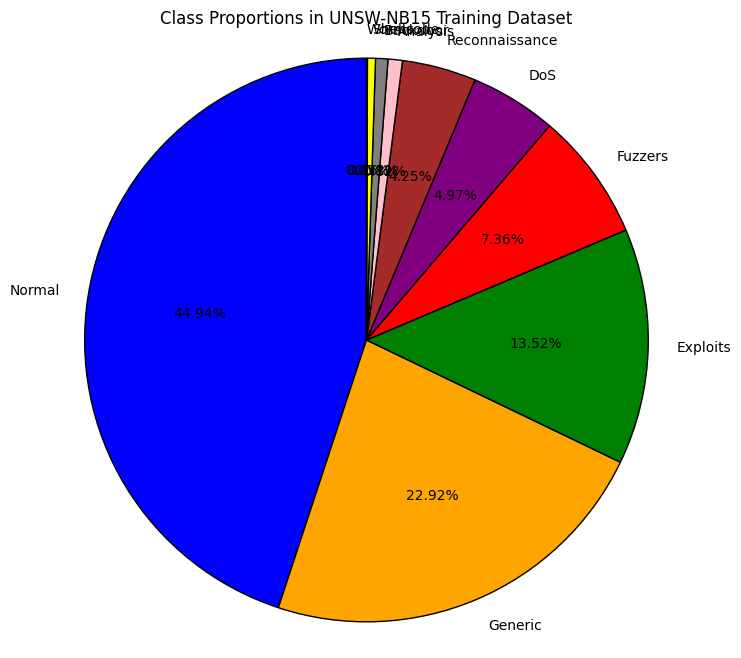

In [17]:
class_counts = test['attack_cat'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', startangle=90, colors=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan'], wedgeprops={'edgecolor': 'black'})

plt.title("Class Proportions in UNSW-NB15 Training Dataset")
plt.axis('equal') 

plt.show()

<h1>III. Preprocessing 

null values appearing in the service feature are treated as ‘other’ type of service

In [ ]:
train["service"] = train["service"].replace(['-', np.nan], "other")
test["service"] = test["service"].replace(['-', np.nan], "other")

transforming nominal features, i.e., proto, service, state, to numerical values.

In [ ]:
categorical_cols = ["proto", "service", "state"]
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

train_encoded = encoder.fit_transform(train[categorical_cols])
test_encoded = encoder.transform(test[categorical_cols])

train = pd.concat([train.drop(columns=categorical_cols), pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())], axis=1)
test = pd.concat([test.drop(columns=categorical_cols), pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out())], axis=1)

Remove the id feature in numerical features. The attack_cat nominal feature that contains the names of attack categories is also removed.

In [19]:
train_binary = train.drop(columns=["id", "attack_cat"])
test_binary = test.drop(columns=["id", "attack_cat"])

Normalize the input feature with the minmax normalization method [39] to improve the classification accuracy

In [4]:
scaler = MinMaxScaler()

X_train_scaled_binary = scaler.fit_transform(train_binary.drop(columns=["label"]))
X_test_scaled_binary = scaler.transform(test_binary.drop(columns=["label"]))

Applying PCA with 4, 8, and 16 components to reduce the dimensionality of scaled training and testing datasets for binary classification.

In [ ]:
pca_4 = PCA(n_components=4)
pca_8 = PCA(n_components=8)
pca_16 = PCA(n_components=16)

X_train_pca_4 = pca_4.fit_transform(X_train_scaled_binary)
X_test_pca_4 = pca_4.transform(X_test_scaled_binary)

X_train_pca_8 = pca_8.fit_transform(X_train_scaled_binary)
X_test_pca_8 = pca_8.transform(X_test_scaled_binary)

X_train_pca_16 = pca_16.fit_transform(X_train_scaled_binary)
X_test_pca_16 = pca_16.transform(X_test_scaled_binary)

<h1>IV. Model 

<h2>1. Binary classification 

The correlation matrix is calculated by combining the features (X) with the target column (y), retaining only those features whose correlation exceeds the specified threshold

In [5]:
def select_features(X, y, threshold):
    X_with_label = pd.concat([X, y.rename("label")], axis=1)
    cor_matrix = X_with_label.corr()
    cor_target = abs(cor_matrix["label"])
    selected_features = cor_target[cor_target > threshold].index.tolist()
    selected_features = [f for f in selected_features if f != "label"]
    return X[selected_features], selected_features

X_train_corr_4, features_4 = select_features(
    X=train_binary.drop(columns=["label"]),
    y=train_binary["label"],    
    threshold=0.011
)
X_train_corr_8, features_8 = select_features(
    X=train_binary.drop(columns=["label"]),
    y=train_binary["label"],
    threshold=0.0137
)
X_train_corr_16, features_16 = select_features(
    X=train_binary.drop(columns=["label"]),
    y=train_binary["label"],
    threshold=0.011
)

X_test_corr_4 = test_binary[features_4]
X_test_corr_8 = test_binary[features_8]
X_test_corr_16 = test_binary[features_16]

print("Selected features (4 features):", features_4[:4])
print("Selected features (8 features):", features_8[:8])
print("Selected features (16 features):", features_16[:16])

Selected features (4 features): ['dur', 'spkts', 'dpkts', 'sbytes']
Selected features (8 features): ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl']
Selected features (16 features): ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'dloss', 'sinpkt', 'dinpkt', 'djit', 'swin', 'stcpb']


Although all previous steps were replicated from the research paper, the selected features' outcomes do not match    with the original results.

Here are ten model will be applied.

In [6]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(max_depth=5, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "MLP": MLPClassifier(max_iter=100, hidden_layer_sizes=(200,)),
    "Bernoulli NB": BernoulliNB(),
    "SGDClassifier": SGDClassifier(loss="hinge", max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

The dataset, selected through correlation-based feature selection and dimensionality reduction using PCA, is trained and tested to evaluate performance metrics, including F1-score, recall, precision, accuracy, and ROC AUC, with results visualized through confusion matrices.

In [7]:
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        start_train = time.time()
        model.fit(X_train, y_train)
        end_train = time.time()
        train_time = end_train - start_train

        start_infer = time.time()
        y_pred = model.predict(X_test)
        end_infer = time.time()
        infer_time = end_infer - start_infer

        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)
        
        try:
            if len(set(y_test)) == 2:  
                y_pred_proba = model.predict_proba(X_test)[:, 1]
                roc_auc = roc_auc_score(y_test, y_pred_proba)
                y_pred_proba = model.predict_proba(X_test)
                roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
        except AttributeError:
            roc_auc = None

        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
        disp.plot(cmap="Blues")
        plt.title(f"Confusion Matrix for {name}")
        plt.show()

        results[name] = {
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "Accuracy": accuracy,
            "ROC AUC": roc_auc,
            "Training Time (s)": train_time,
            "Inference Time (s)": infer_time,
        }

    return pd.DataFrame(results).T

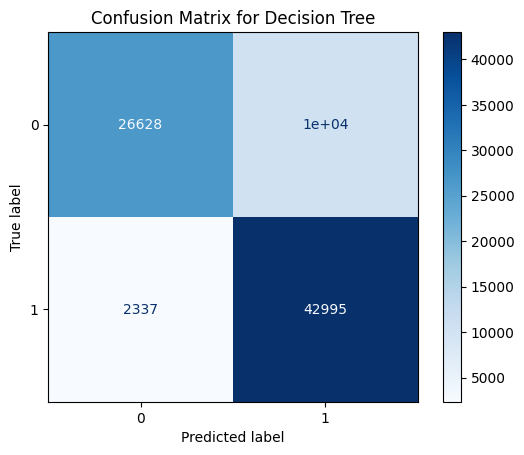

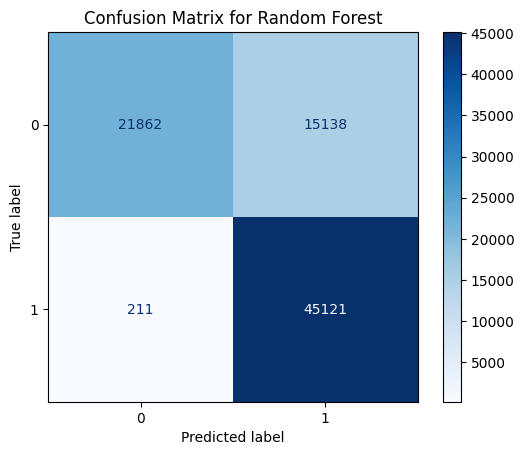

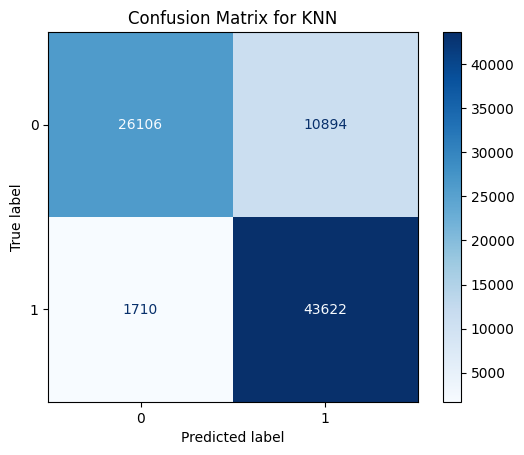

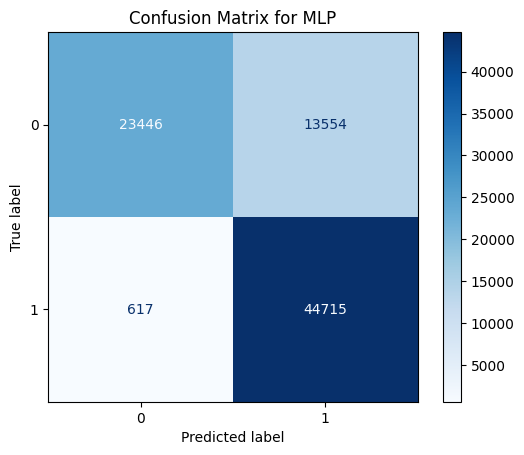

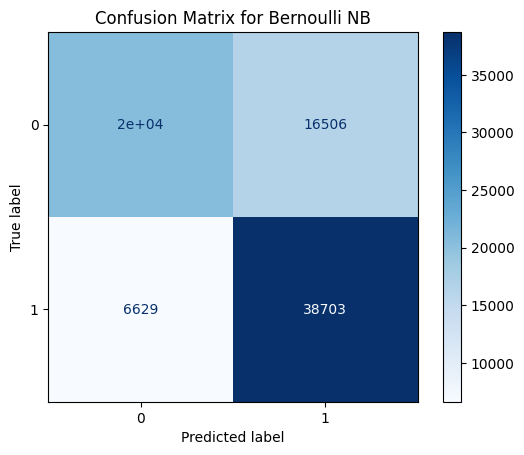

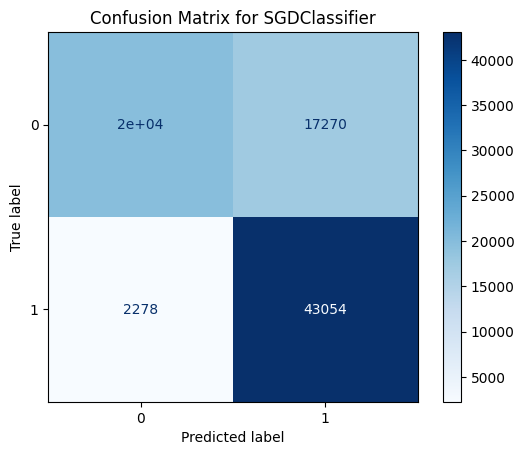

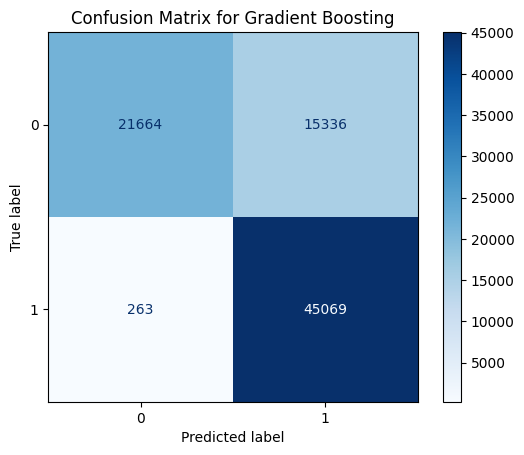

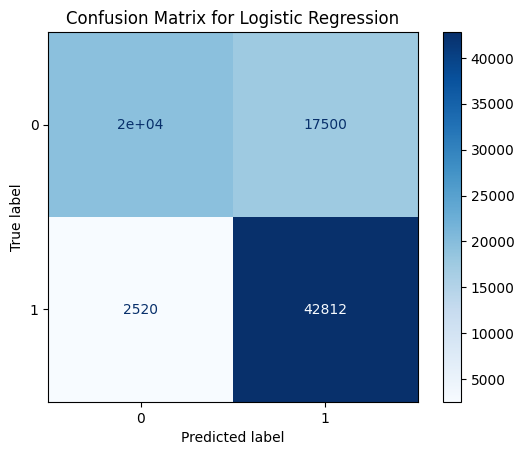

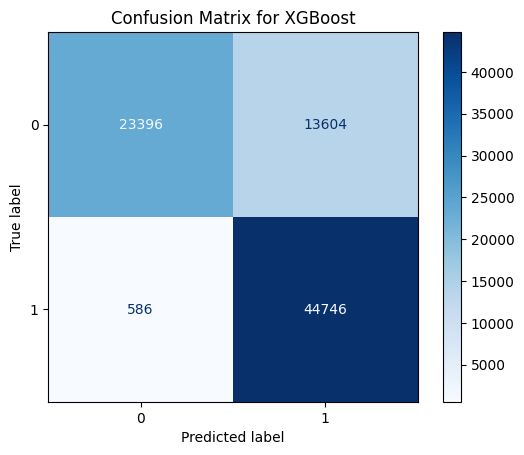

[LightGBM] [Info] Number of positive: 119341, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680622 -> initscore=0.756633
[LightGBM] [Info] Start training from score 0.756633


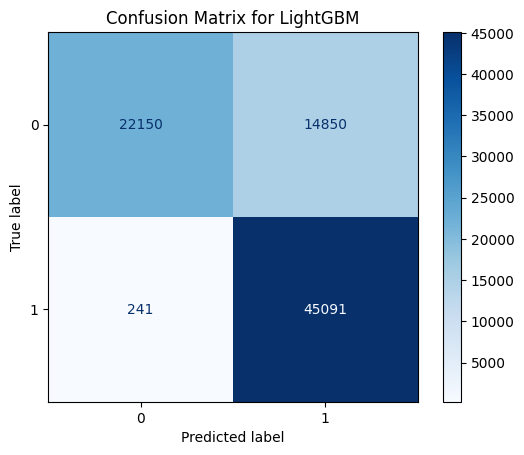

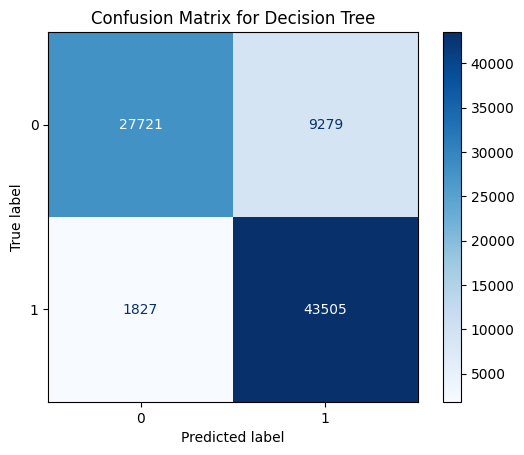

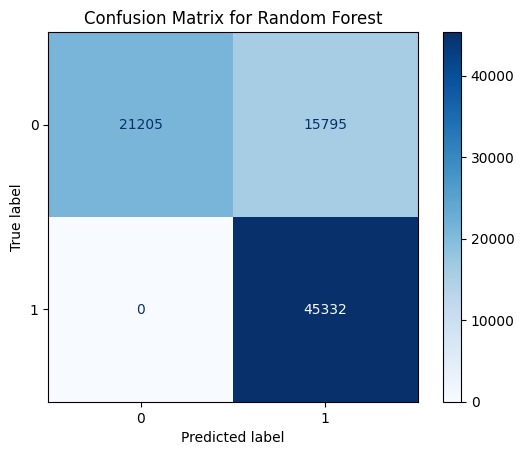

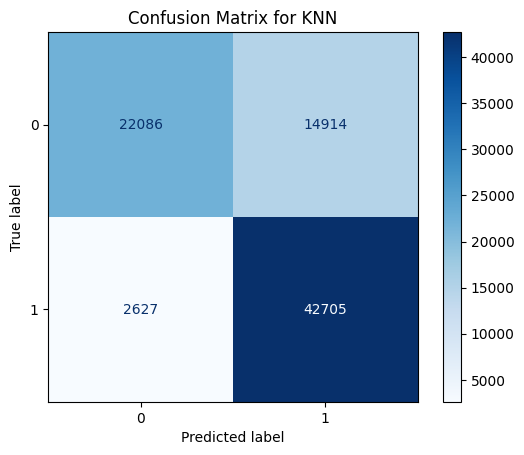

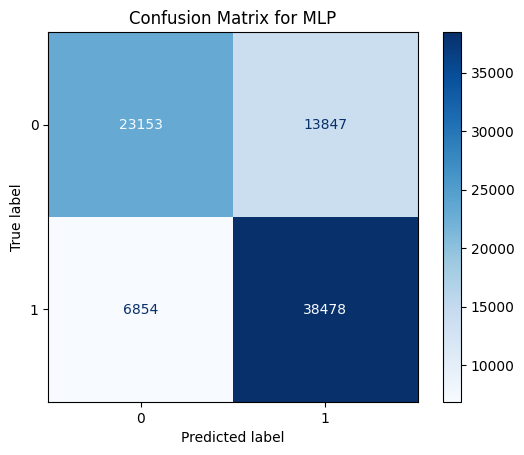

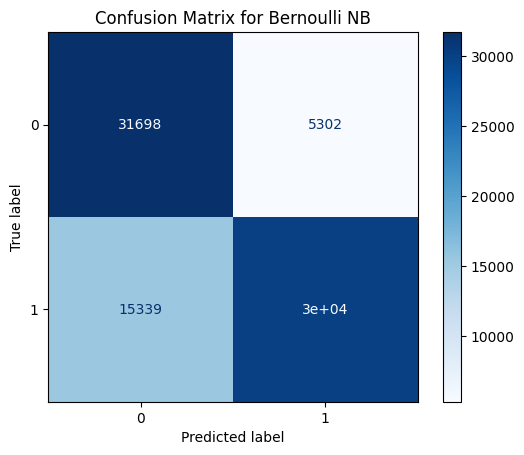

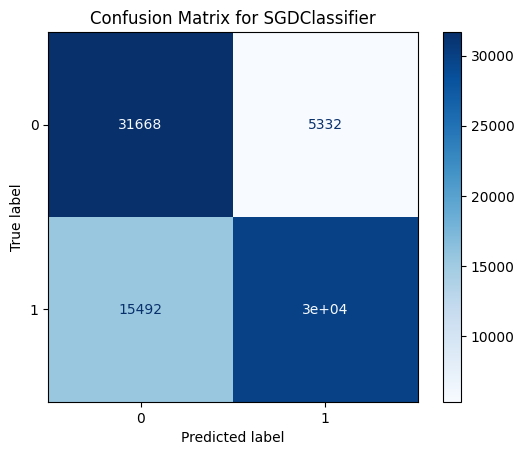

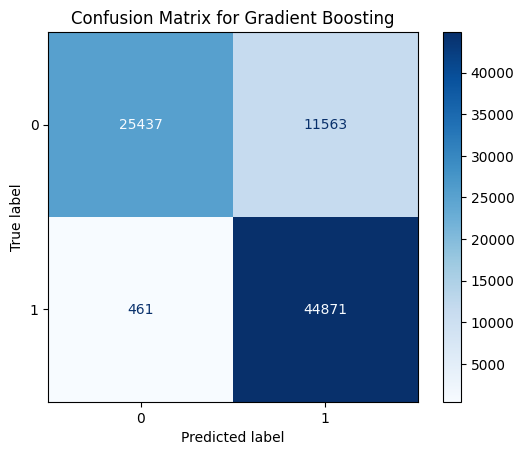

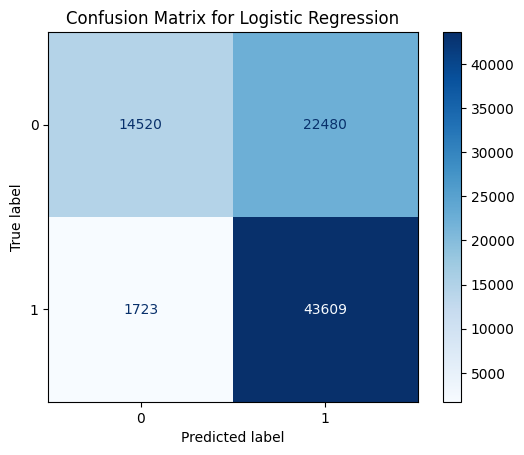

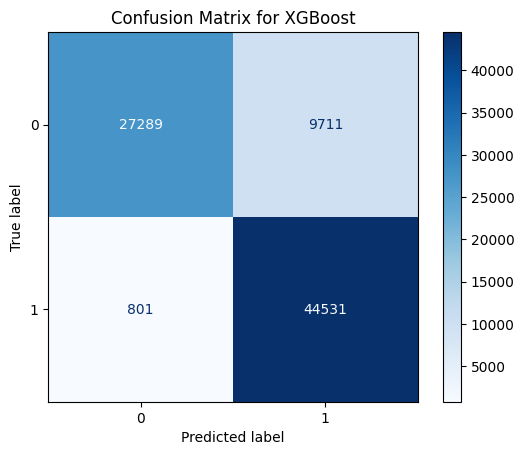

[LightGBM] [Info] Number of positive: 119341, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5498
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 179
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680622 -> initscore=0.756633
[LightGBM] [Info] Start training from score 0.756633


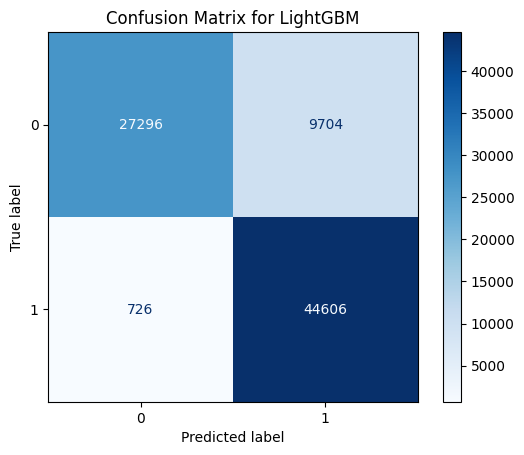

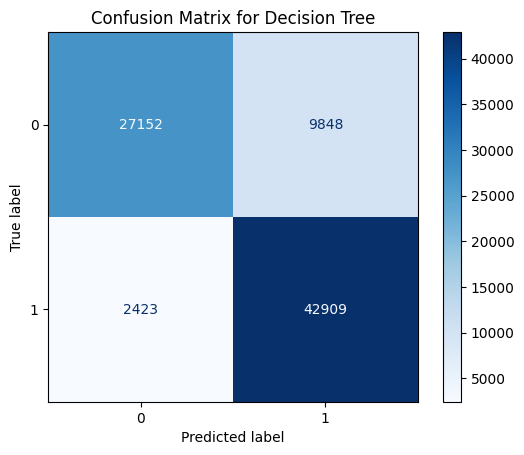

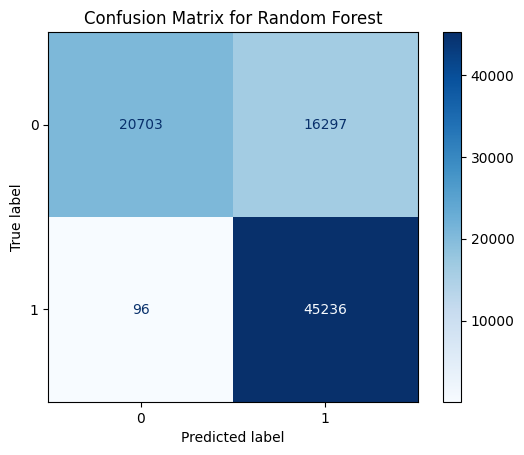

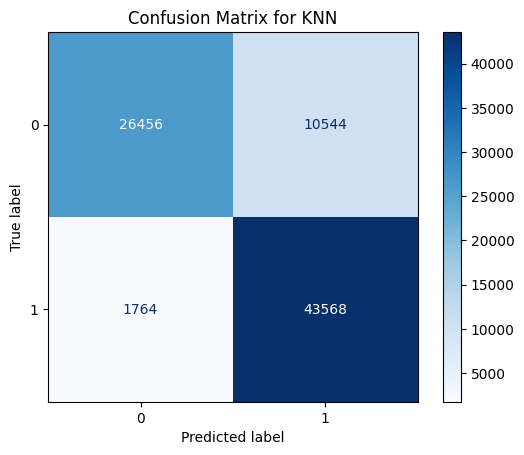

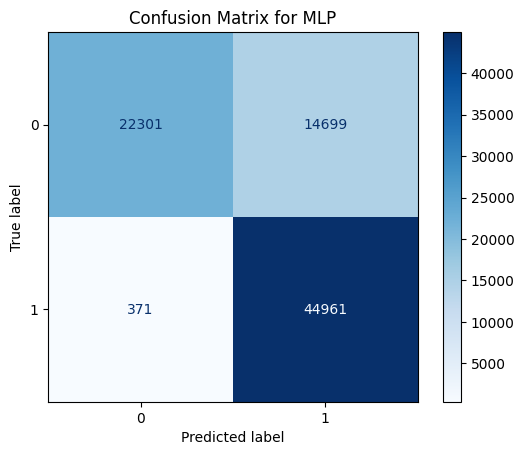

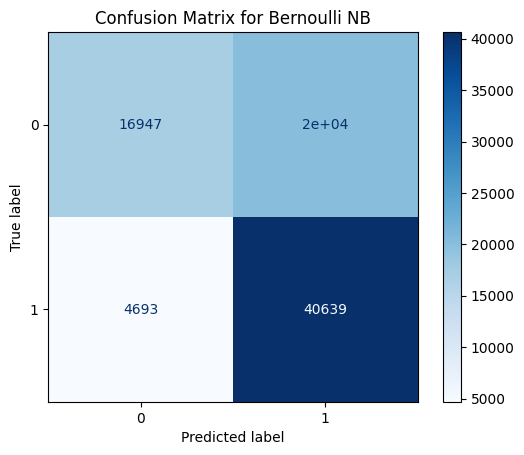

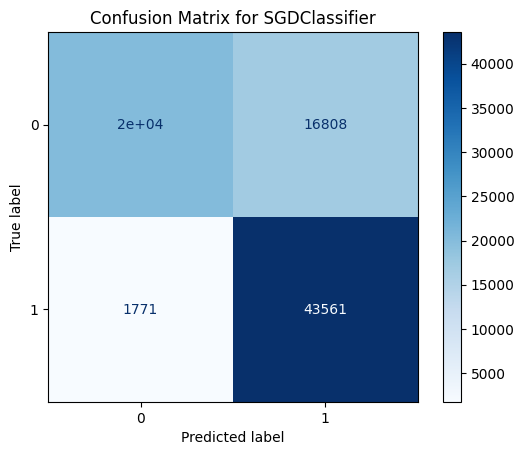

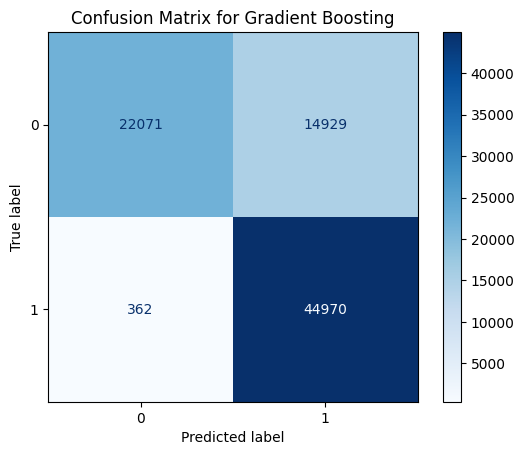

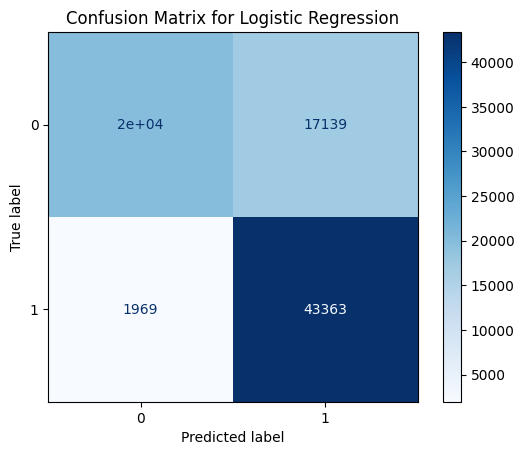

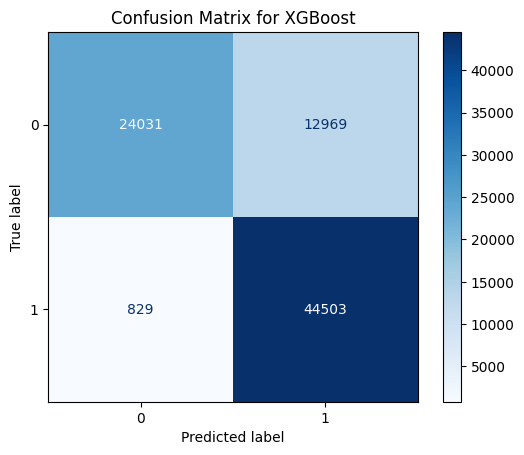

[LightGBM] [Info] Number of positive: 119341, number of negative: 56000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680622 -> initscore=0.756633
[LightGBM] [Info] Start training from score 0.756633


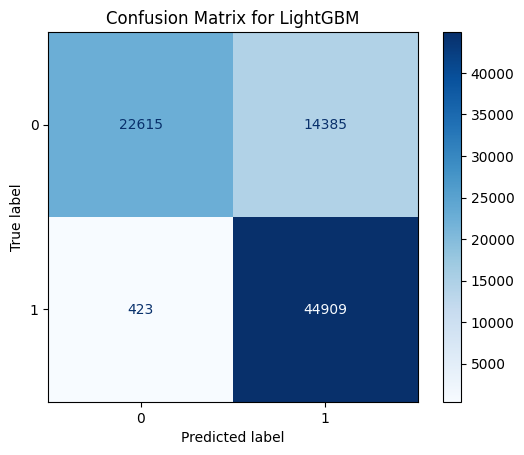

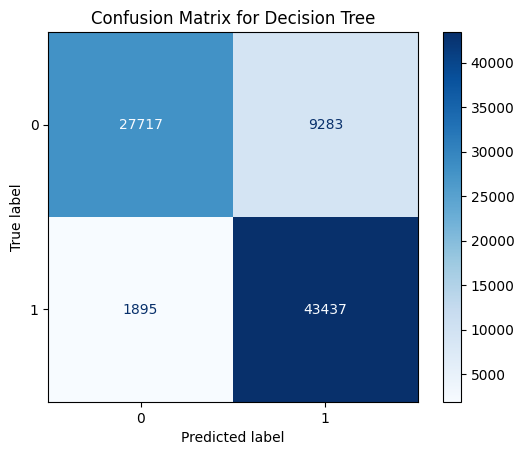

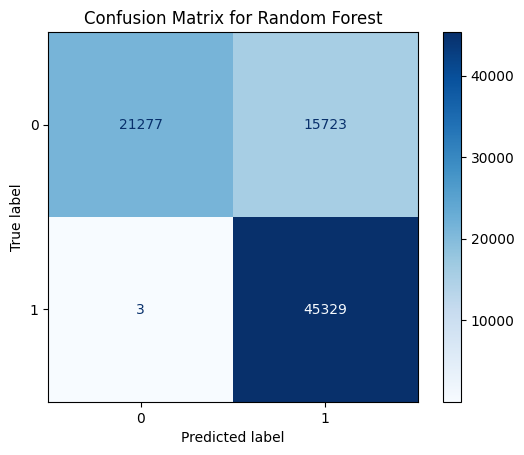

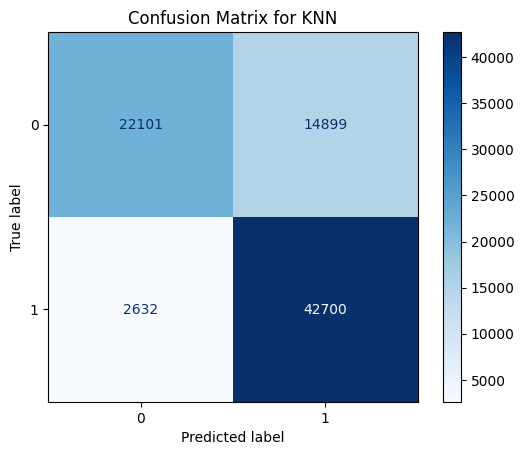

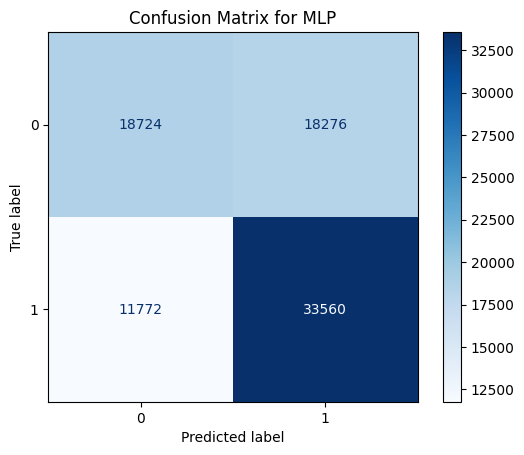

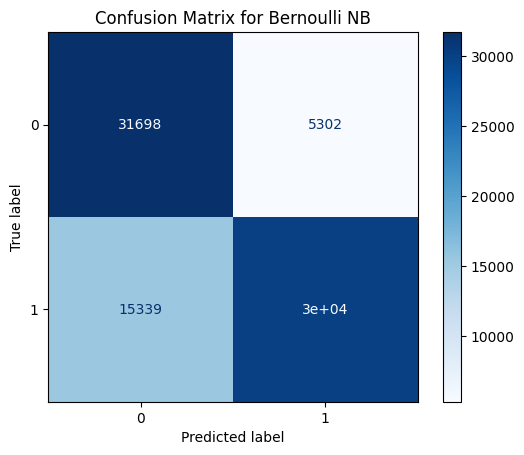

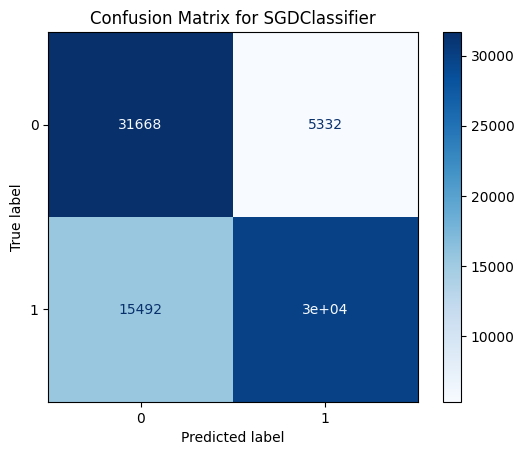

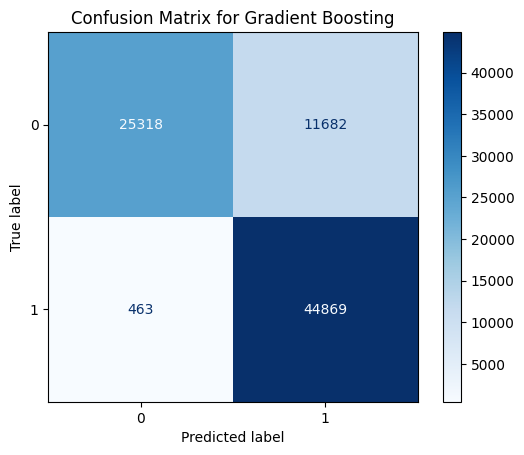

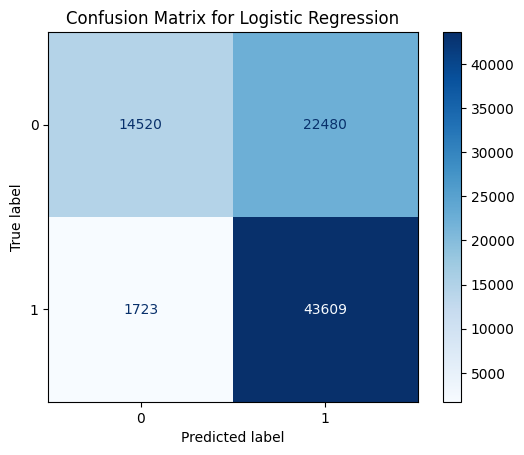

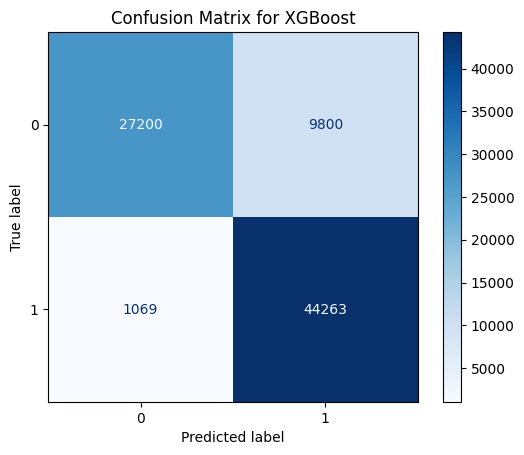

[LightGBM] [Info] Number of positive: 119341, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5488
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 176
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680622 -> initscore=0.756633
[LightGBM] [Info] Start training from score 0.756633


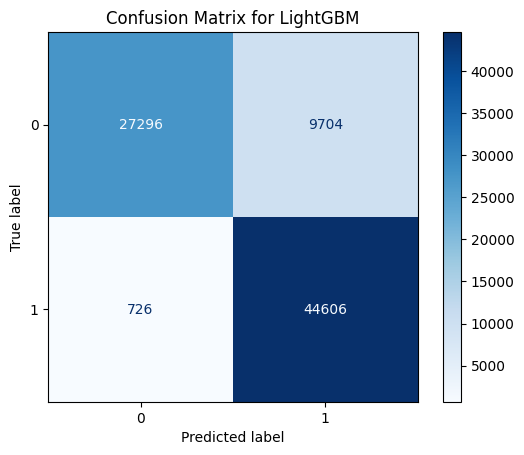

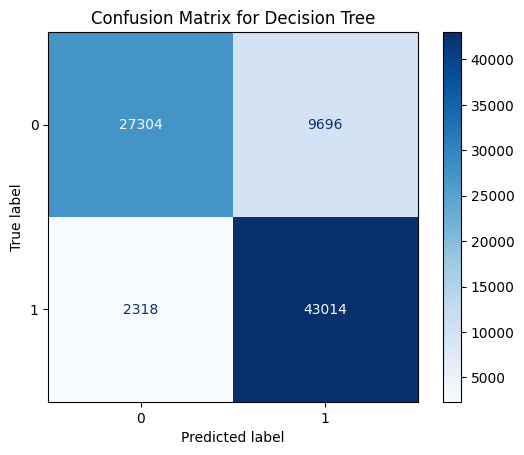

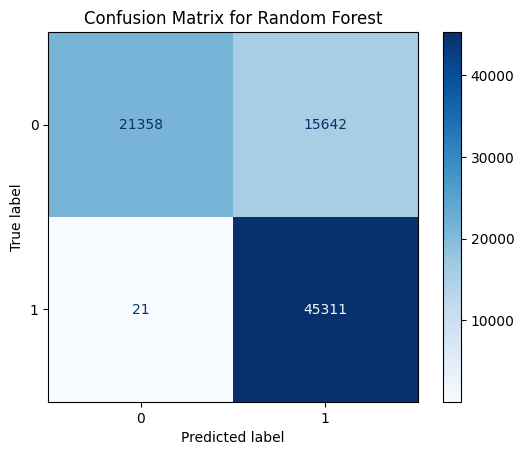

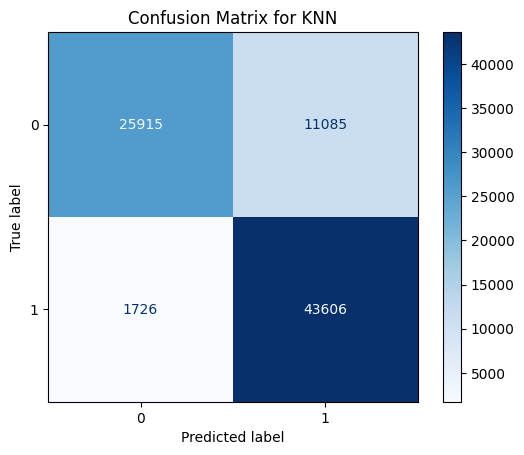

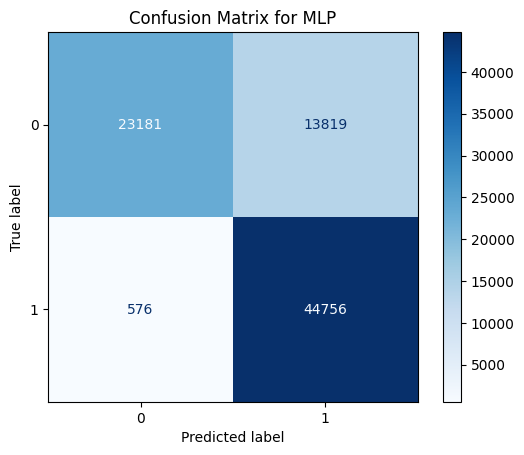

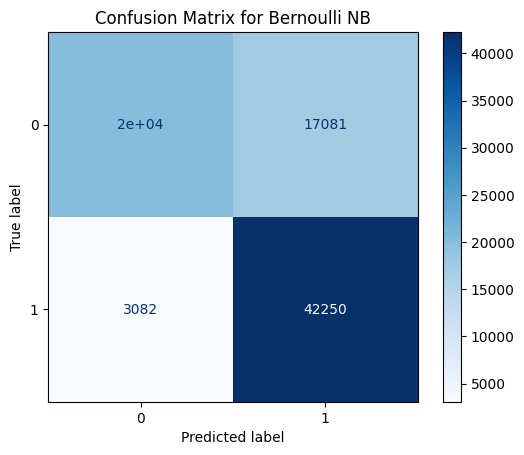

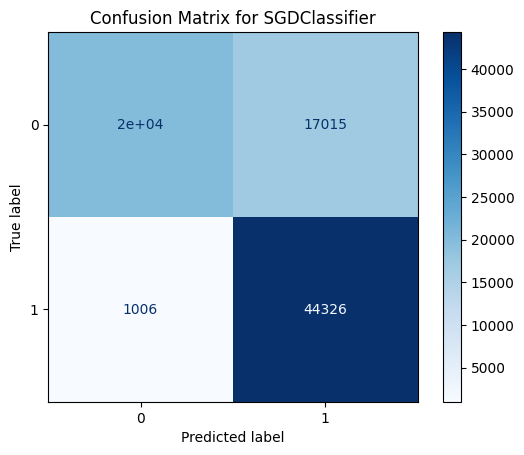

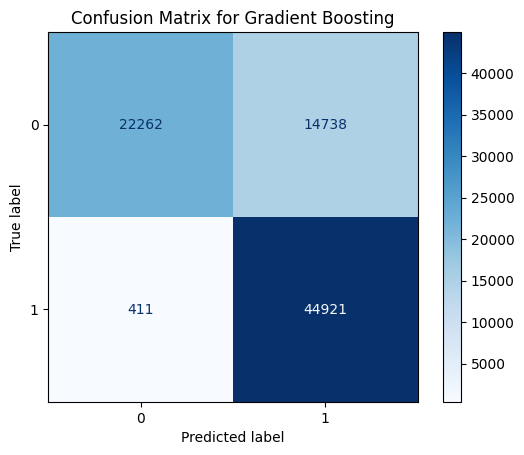

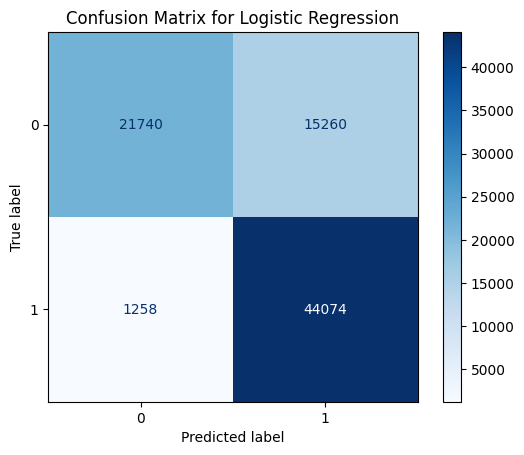

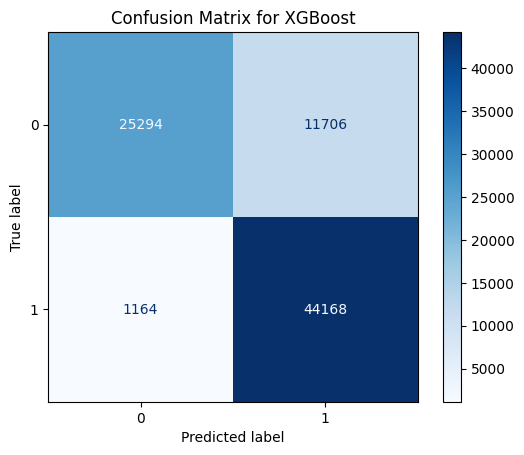

[LightGBM] [Info] Number of positive: 119341, number of negative: 56000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680622 -> initscore=0.756633
[LightGBM] [Info] Start training from score 0.756633


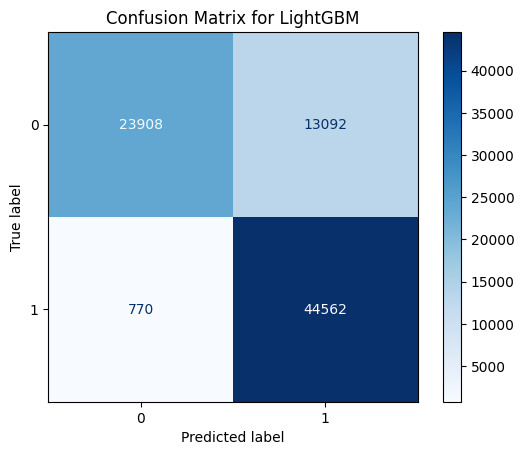

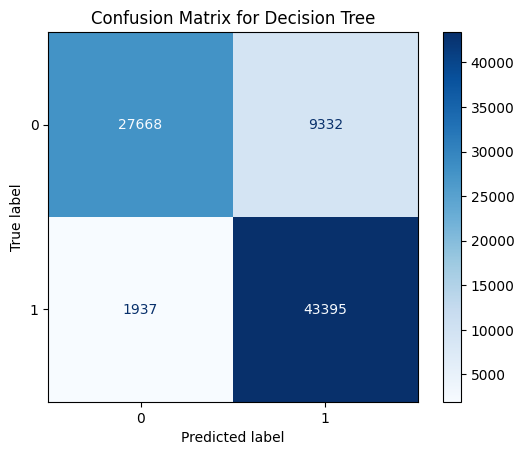

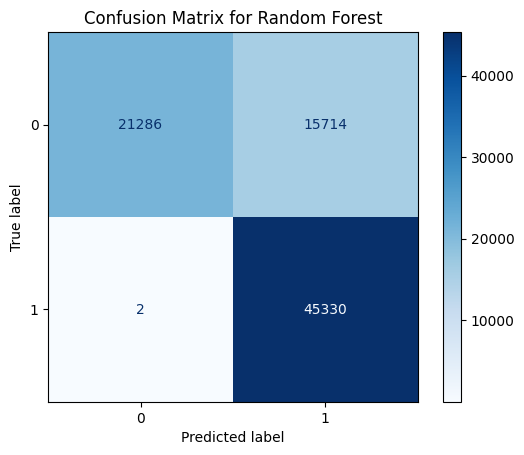

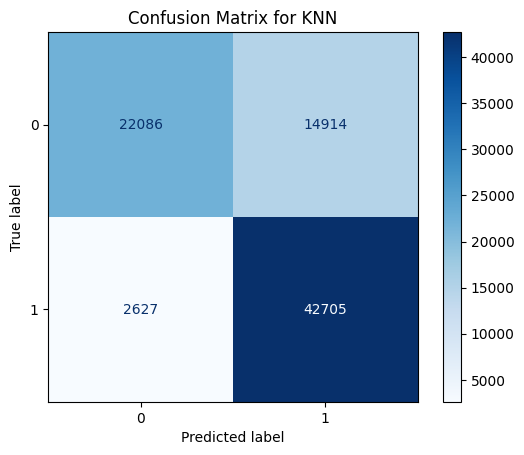

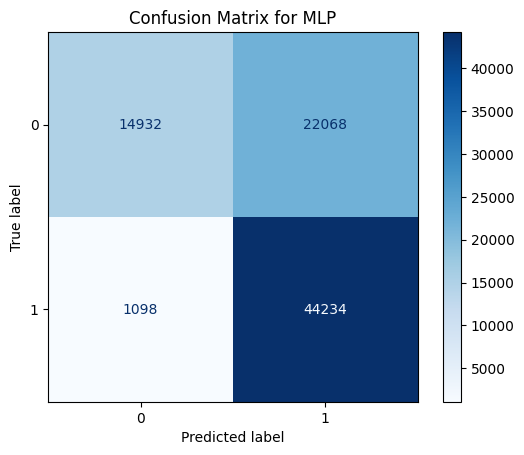

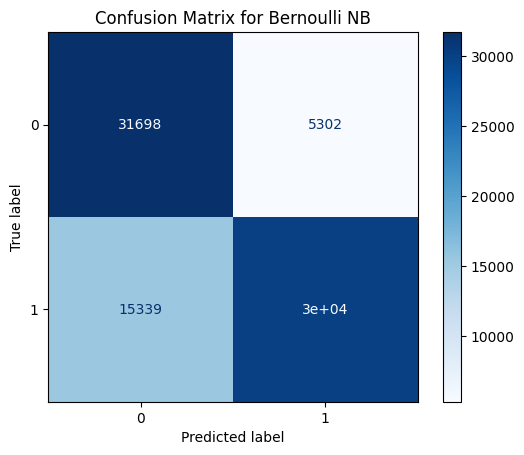

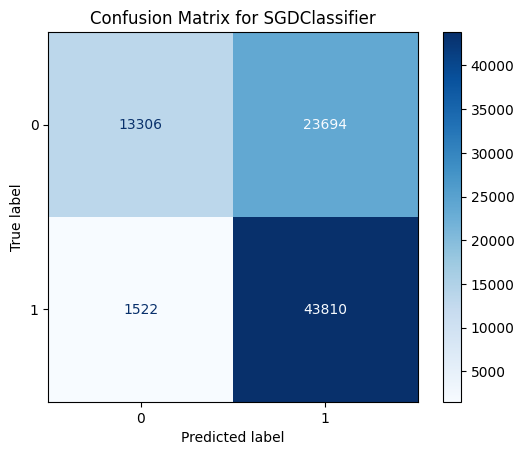

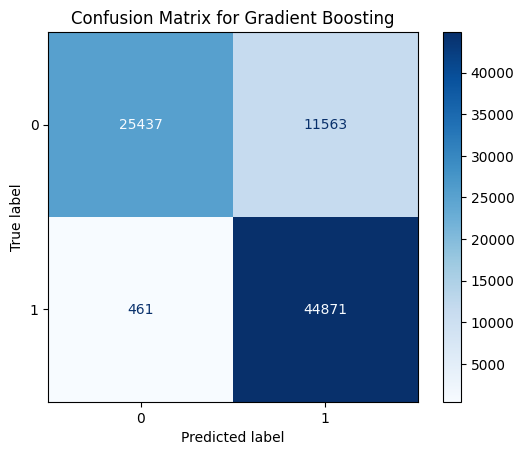

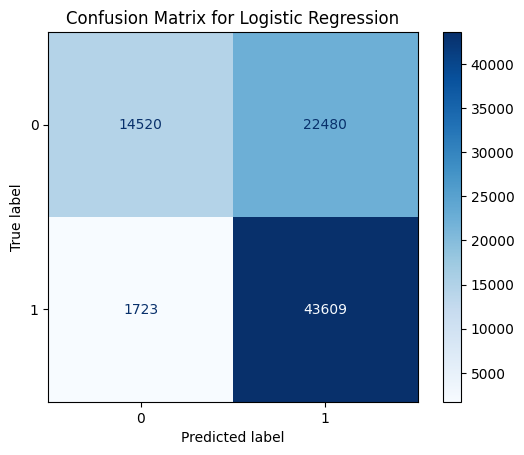

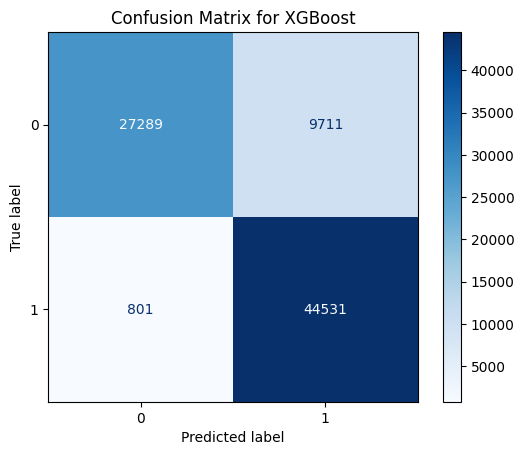

[LightGBM] [Info] Number of positive: 119341, number of negative: 56000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5498
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 179
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680622 -> initscore=0.756633
[LightGBM] [Info] Start training from score 0.756633


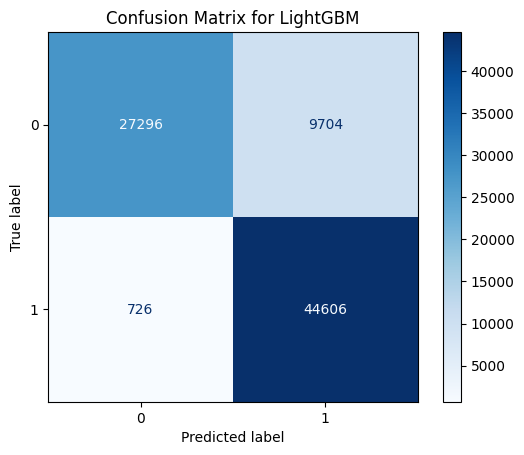

In [8]:
binary_results_pca_4 = train_and_evaluate(models, X_train_pca_4, train_binary["label"], X_test_pca_4, test_binary["label"])
binary_results_corr_4 = train_and_evaluate(models, X_train_corr_4, train_binary["label"], X_test_corr_4, test_binary["label"])
binary_results_pca_8 = train_and_evaluate(models, X_train_pca_8, train_binary["label"], X_test_pca_8, test_binary["label"])
binary_results_corr_8 = train_and_evaluate(models, X_train_corr_8, train_binary["label"], X_test_corr_8, test_binary["label"])
binary_results_pca_16 = train_and_evaluate(models, X_train_pca_16, train_binary["label"], X_test_pca_16, test_binary["label"])
binary_results_corr_16 = train_and_evaluate(models, X_train_corr_16, train_binary["label"], X_test_corr_16, test_binary["label"])

In [9]:
mlp_pca_accuracy = binary_results_pca_4.loc["MLP"]["Accuracy"]
dt_corr_accuracy = binary_results_corr_4.loc["Decision Tree"]["Accuracy"]
mlp_pca_accuracy = binary_results_pca_8.loc["MLP"]["Accuracy"]
dt_corr_accuracy = binary_results_corr_8.loc["Decision Tree"]["Accuracy"]
mlp_pca_accuracy = binary_results_pca_16.loc["MLP"]["Accuracy"]
dt_corr_accuracy = binary_results_corr_16.loc["Decision Tree"]["Accuracy"]

In [10]:
binary_results_pca_4.loc["MLP"]["Accuracy"]

0.8278798037215177

In [11]:
binary_results_corr_4.loc["Decision Tree"]["Accuracy"]

0.865107127240927

In [12]:
binary_results_pca_8.loc["MLP"]["Accuracy"]

0.8169605985522033

In [13]:
binary_results_corr_8.loc["Decision Tree"]["Accuracy"]

0.8642326191517271

In [14]:
binary_results_pca_16.loc["MLP"]["Accuracy"]

0.8251591118884516

In [15]:
binary_results_corr_16.loc["Decision Tree"]["Accuracy"]

0.863127338094544

Although the outcomes do not exactly match those presented in the research paper, they demonstrate comparable characteristics, such as the model achieving the highest precision and exhibiting similar performance properties.

In [16]:
binary_results_pca_4

Precision    Recall        F1  Accuracy   ROC AUC  \
Decision Tree         0.856730  0.845637  0.842519  0.845637  0.836776   
Random Forest         0.857385  0.813572  0.803195  0.813572  0.954109   
KNN                   0.862346  0.846913  0.843107  0.846913  0.931526   
MLP                   0.860401  0.827880  0.820393  0.827880  0.967362   
Bernoulli NB          0.725550  0.719004  0.711165  0.719004  0.853785   
SGDClassifier         0.795854  0.762571  0.749255  0.762571       NaN   
Gradient Boosting     0.854820  0.810535  0.799808  0.810535  0.961601   
Logistic Regression   0.788809  0.756838  0.743219  0.756838  0.880549   
XGBoost               0.860649  0.827649  0.820073  0.827649  0.968915   
LightGBM              0.858755  0.816706  0.806880  0.816706  0.968130   

                     Training Time (s)  Inference Time (s)  
Decision Tree                 1.929706            0.023322  
Random Forest                 3.765275            0.087708  
KNN                           0.211351            4.011092  
MLP                         111.736173            0.099234  
Bernoulli NB                  0.057796            0.011035  
SGDClassifier                 0.218023            0.000000  
Gradient Boosting            55.344513            0.108217  
Logistic Regression           0.156266            0.001160  
XGBoost                       0.492703            0.032766  
LightGBM                      0.550237            0.074548

In [17]:
binary_results_corr_4

Precision    Recall        F1  Accuracy   ROC AUC  \
Decision Tree         0.875422  0.865107  0.862677  0.865107  0.856870   
Random Forest         0.857727  0.808155  0.796356  0.808155  0.955208   
KNN                   0.809712  0.786948  0.778452  0.786948  0.864970   
MLP                   0.751643  0.748567  0.744449  0.748567  0.737559   
Bernoulli NB          0.770738  0.749296  0.748662  0.749296  0.855570   
SGDClassifier         0.768903  0.747073  0.746379  0.747073       NaN   
Gradient Boosting     0.879186  0.853957  0.849034  0.853957  0.977943   
Logistic Regression   0.765044  0.706032  0.676111  0.706032  0.814548   
XGBoost               0.888611  0.872322  0.869295  0.872322  0.983024   
LightGBM              0.889977  0.873318  0.870279  0.873318  0.985144   

                     Training Time (s)  Inference Time (s)  
Decision Tree                 5.945516            0.091961  
Random Forest                 2.536227            0.175562  
KNN                           0.275179           43.331803  
MLP                         104.099521            0.266805  
Bernoulli NB                  0.468026            0.183604  
SGDClassifier                53.422535            0.058907  
Gradient Boosting           173.880853            0.449715  
Logistic Regression           3.039104            0.049327  
XGBoost                       1.944511            0.116777  
LightGBM                      1.468804            0.175756

In the original five models using four selected/extracted features for binary classification, the Decision Tree consistently achieved the best performance. However, when evaluating all ten models, LightGBM emerged as the top performer.

In [18]:
binary_results_pca_8

Precision    Recall        F1  Accuracy   ROC AUC  \
Decision Tree         0.860403  0.850957  0.848287  0.850957  0.842923   
Random Forest         0.852099  0.800892  0.788079  0.800892  0.953244   
KNN                   0.864621  0.850508  0.847045  0.850508  0.935129   
MLP                   0.856990  0.816961  0.807475  0.816961  0.967641   
Bernoulli NB          0.720618  0.699436  0.681844  0.699436  0.858797   
SGDClassifier         0.810464  0.774340  0.761617  0.774340       NaN   
Gradient Boosting     0.855519  0.814276  0.804371  0.814276  0.963998   
Logistic Regression   0.803492  0.767915  0.754626  0.767915  0.900710   
XGBoost               0.860767  0.832410  0.825861  0.832410  0.969887   
LightGBM              0.858170  0.820143  0.811230  0.820143  0.969213   

                     Training Time (s)  Inference Time (s)  
Decision Tree                 3.922221            0.015666  
Random Forest                 3.690346            0.163751  
KNN                           0.424796            4.657479  
MLP                         103.433855            0.082380  
Bernoulli NB                  0.057740            0.008792  
SGDClassifier                 0.275447            0.000000  
Gradient Boosting           105.818710            0.108933  
Logistic Regression           0.317832            0.008183  
XGBoost                       0.525397            0.032974  
LightGBM                      0.516845            0.081057

In [19]:
binary_results_corr_8

Precision    Recall        F1  Accuracy   ROC AUC  \
Decision Tree         0.874291  0.864233  0.861818  0.864233  0.856132   
Random Forest         0.858138  0.808993  0.797345  0.808993  0.957010   
KNN                   0.809754  0.787069  0.778602  0.787069  0.865103   
MLP                   0.632397  0.635039  0.629669  0.635039  0.623316   
Bernoulli NB          0.770738  0.749296  0.748662  0.749296  0.855828   
SGDClassifier         0.768903  0.747073  0.746379  0.747073       NaN   
Gradient Boosting     0.878189  0.852487  0.847429  0.852487  0.977924   
Logistic Regression   0.765044  0.706032  0.676111  0.706032  0.814548   
XGBoost               0.883199  0.867986  0.864954  0.867986  0.981242   
LightGBM              0.889977  0.873318  0.870279  0.873318  0.985144   

                     Training Time (s)  Inference Time (s)  
Decision Tree                 5.916899            0.116816  
Random Forest                 2.528307            0.167175  
KNN                           0.191515           41.462643  
MLP                         116.678185            0.187023  
Bernoulli NB                  0.449900            0.210913  
SGDClassifier                50.182250            0.060325  
Gradient Boosting           154.493879            0.311597  
Logistic Regression           2.498909            0.042603  
XGBoost                       1.350879            0.075934  
LightGBM                      0.867570            0.108428

Among the original five models using eight selected/extracted features for binary classification, the Decision Tree delivered the best performance. Bernoulli Naive Bayes demonstrated the highest efficiency in training time.

In [20]:
binary_results_pca_16

Precision    Recall        F1  Accuracy   ROC AUC  \
Decision Tree         0.863550  0.854079  0.851489  0.854079  0.846088   
Random Forest         0.858261  0.809758  0.798286  0.809758  0.958200   
KNN                   0.860340  0.844398  0.840414  0.844398  0.933834   
MLP                   0.859207  0.825159  0.817246  0.825159  0.969500   
Bernoulli NB          0.781269  0.755101  0.742910  0.755101  0.862834   
SGDClassifier         0.825735  0.781118  0.767330  0.781118       NaN   
Gradient Boosting     0.855835  0.816001  0.806467  0.816001  0.967467   
Logistic Regression   0.833810  0.799373  0.789382  0.799373  0.943587   
XGBoost               0.864874  0.843682  0.838839  0.843682  0.972000   
LightGBM              0.860948  0.831633  0.824887  0.831633  0.971565   

                     Training Time (s)  Inference Time (s)  
Decision Tree                 4.361623            0.010181  
Random Forest                 4.978827            0.074294  
KNN                           0.021670            7.865179  
MLP                          86.172300            0.063118  
Bernoulli NB                  0.060111            0.018646  
SGDClassifier                 0.286494            0.003015  
Gradient Boosting           121.670083            0.063554  
Logistic Regression           0.442679            0.000000  
XGBoost                       0.429401            0.021754  
LightGBM                      0.407913            0.032446

In [21]:
binary_results_corr_16

Precision    Recall        F1  Accuracy   ROC AUC  \
Decision Tree         0.873147  0.863127  0.860690  0.863127  0.854873   
Random Forest         0.858222  0.809114  0.797484  0.809114  0.952785   
KNN                   0.809712  0.786948  0.778452  0.786948  0.864970   
MLP                   0.785956  0.718627  0.689422  0.718627  0.689997   
Bernoulli NB          0.770738  0.749296  0.748662  0.749296  0.855570   
SGDClassifier         0.760611  0.693728  0.658307  0.693728       NaN   
Gradient Boosting     0.879186  0.853957  0.849034  0.853957  0.977901   
Logistic Regression   0.765044  0.706032  0.676111  0.706032  0.814548   
XGBoost               0.888611  0.872322  0.869295  0.872322  0.983024   
LightGBM              0.889977  0.873318  0.870279  0.873318  0.985144   

                     Training Time (s)  Inference Time (s)  
Decision Tree                 3.472547            0.083840  
Random Forest                 1.922150            0.146015  
KNN                           0.165716           25.510257  
MLP                          47.539826            0.165541  
Bernoulli NB                  0.330338            0.145377  
SGDClassifier                41.118601            0.045464  
Gradient Boosting            97.388329            0.325193  
Logistic Regression           2.444226            0.043589  
XGBoost                       1.470958            0.069870  
LightGBM                      0.883625            0.104421

Among the original five models utilizing 16 selected/extracted features for binary classification, the Decision Tree consistently delivered the best performance, while Bernoulli Naive Bayes demonstrated the highest efficiency in training time. Similarly, across other thresholds, LightGBM maintained its dominance across all evaluation metrics.

<h2>2. Multiclass classification 

The process remains the same as binary classification, with the only difference being that attack_cat is now the target variable for multi-class classification.

In [ ]:
label_encoder = LabelEncoder()
train["attack_cat"] = label_encoder.fit_transform(train["attack_cat"])
test["attack_cat"] = label_encoder.transform(test["attack_cat"])

In [ ]:
train_multi = train.drop(columns=["id"])
test_multi = test.drop(columns=["id"])

In [ ]:
scaler = MinMaxScaler()
X_train_scaled_multi = scaler.fit_transform(train_multi.drop(columns=["attack_cat"]))
X_test_scaled_multi = scaler.transform(test_multi.drop(columns=["attack_cat"]))

In [ ]:
pca_4 = PCA(n_components=4)
pca_8 = PCA(n_components=8)
pca_16 = PCA(n_components=16)

X_train_pca_4 = pca_4.fit_transform(X_train_scaled_multi)
X_test_pca_4 = pca_4.transform(X_test_scaled_multi)

X_train_pca_8 = pca_8.fit_transform(X_train_scaled_multi)
X_test_pca_8 = pca_8.transform(X_test_scaled_multi)

X_train_pca_16 = pca_16.fit_transform(X_train_scaled_multi)
X_test_pca_16 = pca_16.transform(X_test_scaled_multi)

In [22]:
def select_features(X, y, threshold):
    X_with_label = pd.concat([X, y.rename("attack_cat")], axis=1)
    cor_matrix = X_with_label.corr()
    cor_target = abs(cor_matrix["attack_cat"])
    selected_features = cor_target[cor_target > threshold].index.tolist()
    selected_features = [f for f in selected_features if f != "attack_cat"]
    return X[selected_features], selected_features

X_train_corr_4, features_4 = select_features(
    train_multi.drop(columns=["attack_cat"]),
    train_multi["attack_cat"],
    threshold=0.011
)
X_train_corr_8, features_8 = select_features(
    train_multi.drop(columns=["attack_cat"]),
    train_multi["attack_cat"],
    threshold=0.0137
)
X_train_corr_16, features_16 = select_features(
    train_multi.drop(columns=["attack_cat"]),
    train_multi["attack_cat"],
    threshold=0.011
)

X_test_corr_4 = test_multi[features_4]
X_test_corr_8 = test_multi[features_8]
X_test_corr_16 = test_multi[features_16]

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(max_depth=5),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "MLP": MLPClassifier(max_iter=100, hidden_layer_sizes=(200,)),
    "Bernoulli NB": BernoulliNB(),
    "SGDClassifier": SGDClassifier(loss="hinge", max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

In [ ]:
def train_and_evaluate(models, X_train, y_train, X_test, y_test, is_multiclass=False):
    results = {}
    for name, model in models.items():
        start_train_time = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start_train_time

        start_infer_time = time.time()
        y_pred = model.predict(X_test)
        infer_time = time.time() - start_infer_time

        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")
        accuracy = accuracy_score(y_test, y_pred)

        y_pred_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
        if y_pred_proba is not None:
            if is_multiclass:
                roc_auc = roc_auc_score(y_test, y_pred_proba, average="weighted", multi_class="ovr")
            else:
                roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        else:
            roc_auc = None

        disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=None, cmap="Blues")
        plt.title(f"Confusion Matrix: {name}")
        plt.show()

        results[name] = {
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "Accuracy": accuracy,
            "ROC AUC": roc_auc,
            "Training Time (s)": train_time,
            "Inference Time (s)": infer_time,
        }
    return pd.DataFrame(results).T

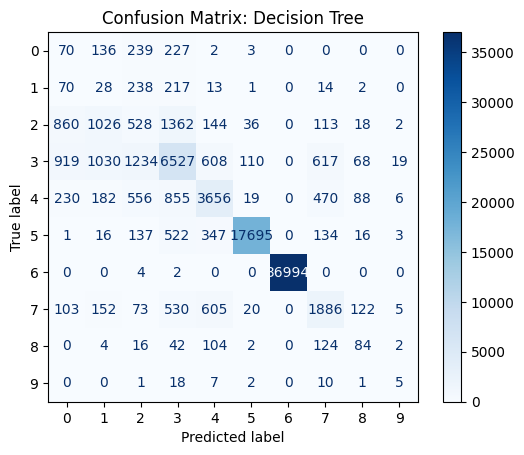

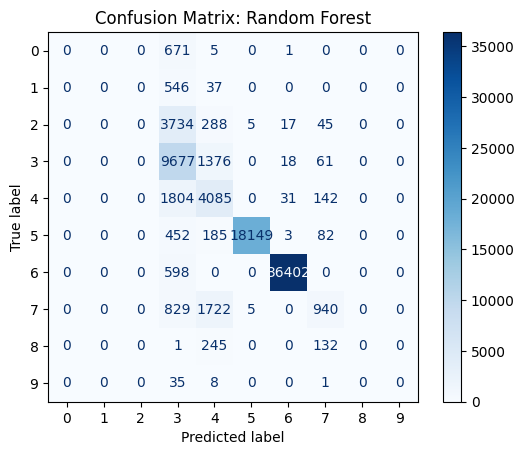

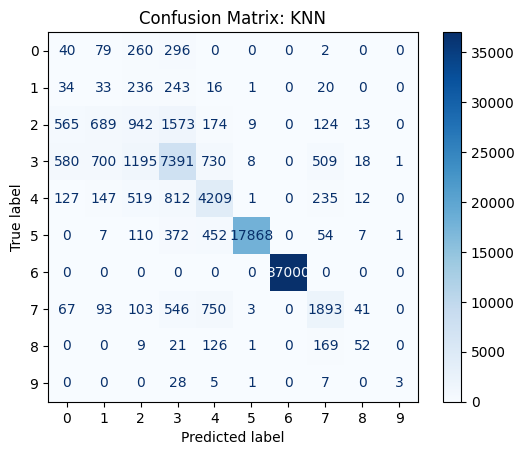

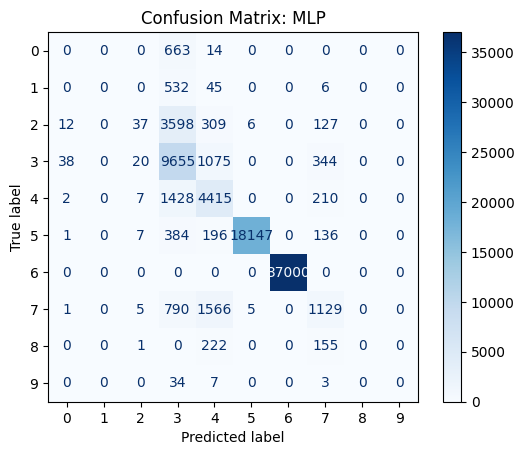

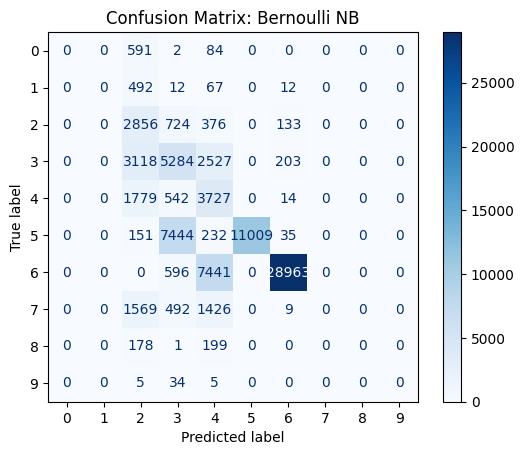

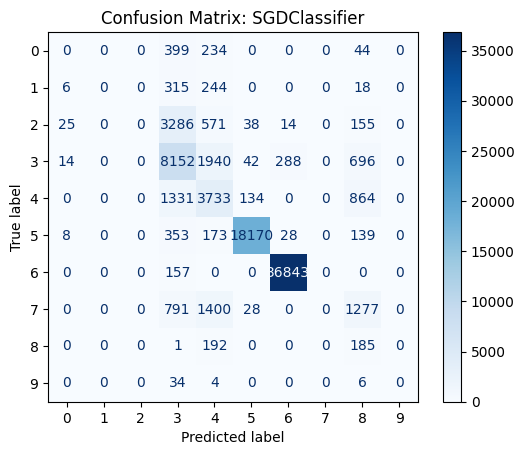

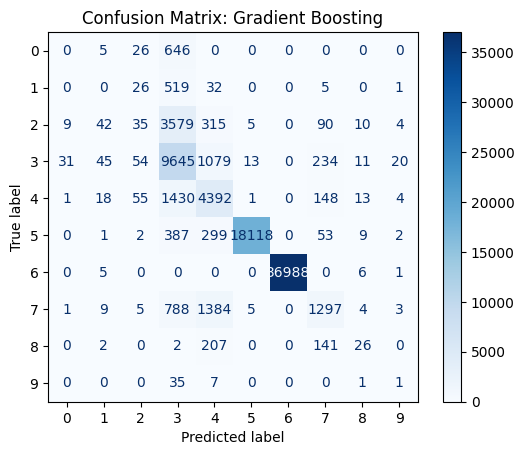

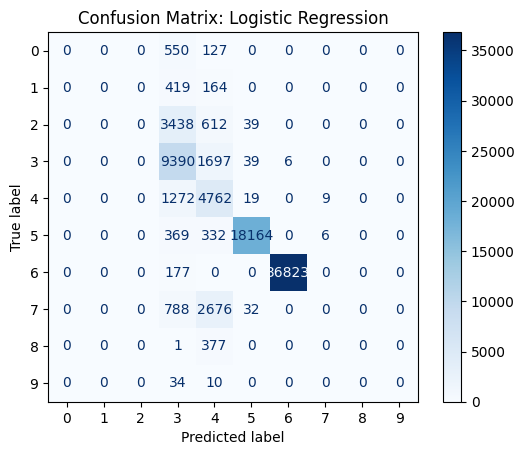

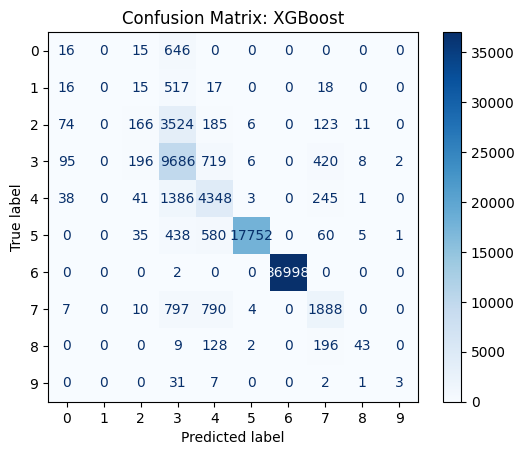

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 4
[LightGBM] [Info] Start training from score -4.473585
[LightGBM] [Info] Start training from score -4.609405
[LightGBM] [Info] Start training from score -2.660065
[LightGBM] [Info] Start training from score -1.658386
[LightGBM] [Info] Start training from score -2.266191
[LightGBM] [Info] Start training from score -1.477853
[LightGBM] [Info] Start training from score -1.141381
[LightGBM] [Info] Start training from score -2.816215
[LightGBM] [Info] Start training from score -5.041864
[LightGBM] [Info] Start training from score -7.206953


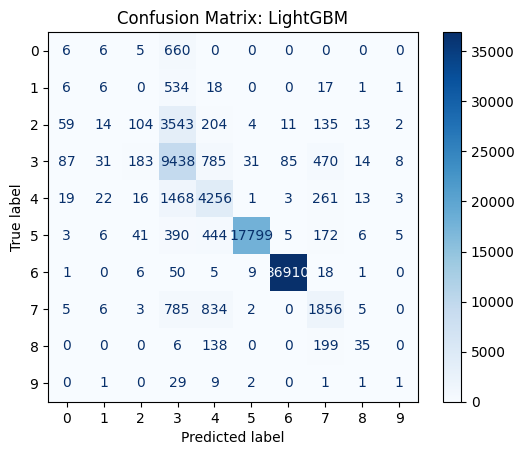

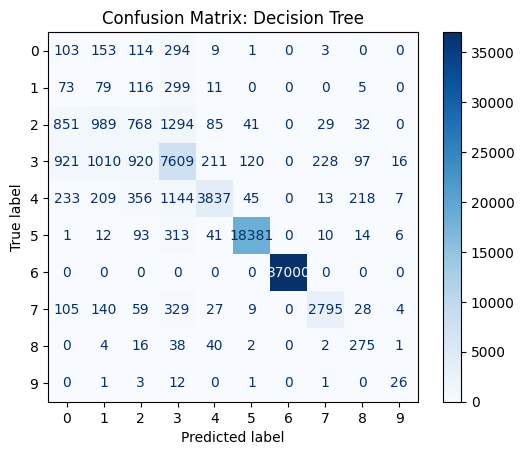

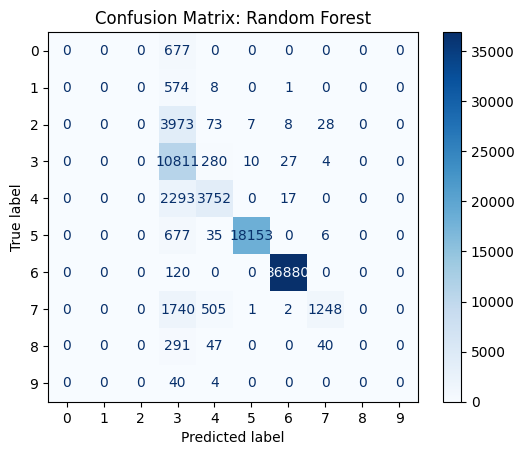

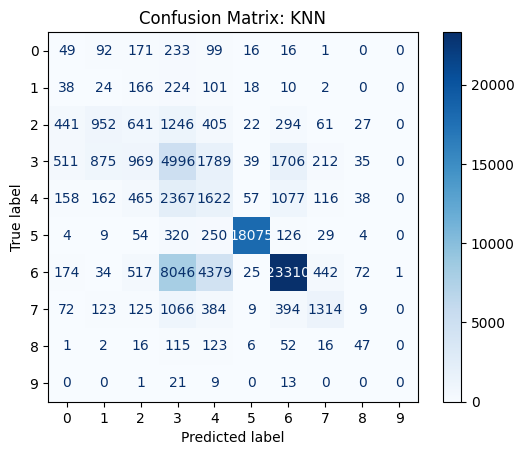

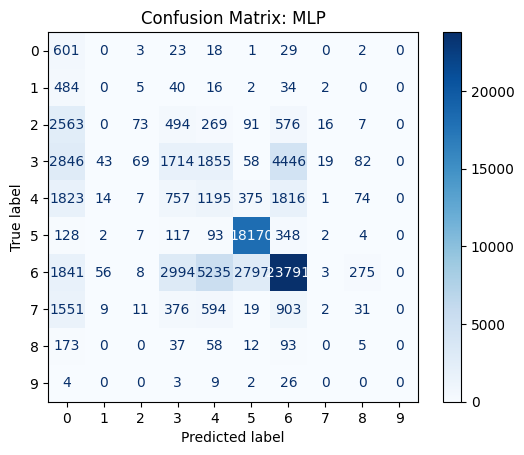

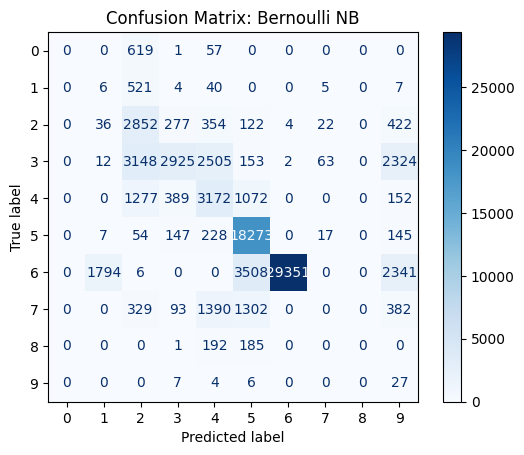

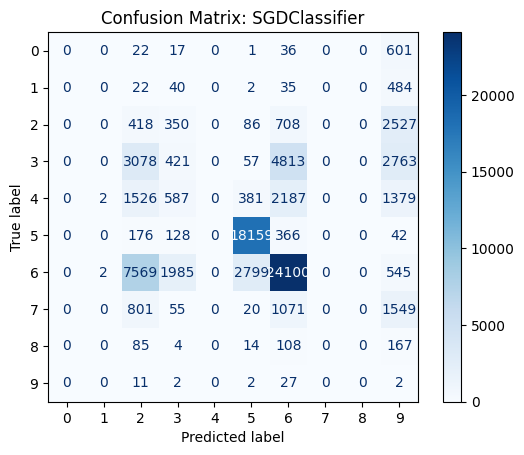

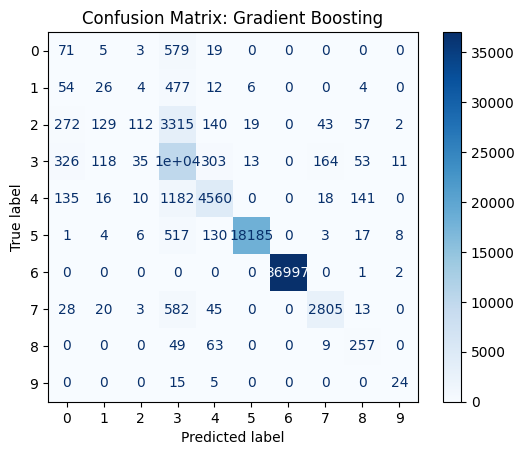

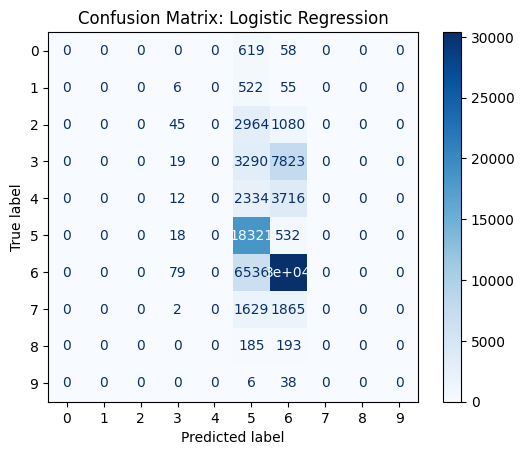

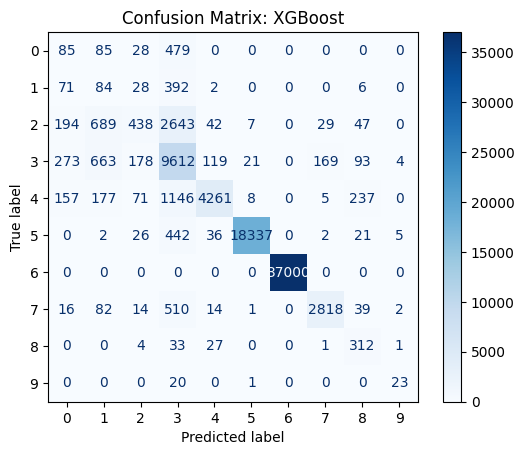

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5002
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 182
[LightGBM] [Info] Start training from score -4.473585
[LightGBM] [Info] Start training from score -4.609405
[LightGBM] [Info] Start training from score -2.660065
[LightGBM] [Info] Start training from score -1.658386
[LightGBM] [Info] Start training from score -2.266191
[LightGBM] [Info] Start training from score -1.477853
[LightGBM] [Info] Start training from score -1.141381
[LightGBM] [Info] Start training from score -2.816215
[LightGBM] [Info] Start training from score -5.041864
[LightGBM] [Info] Start training from score -7.206953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

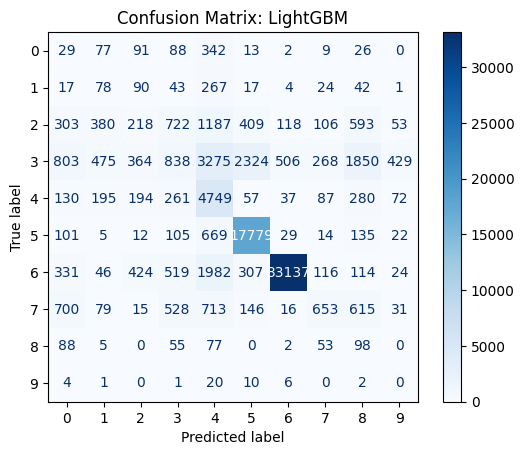

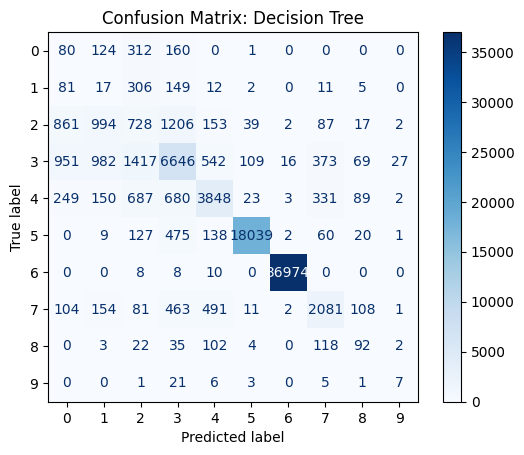

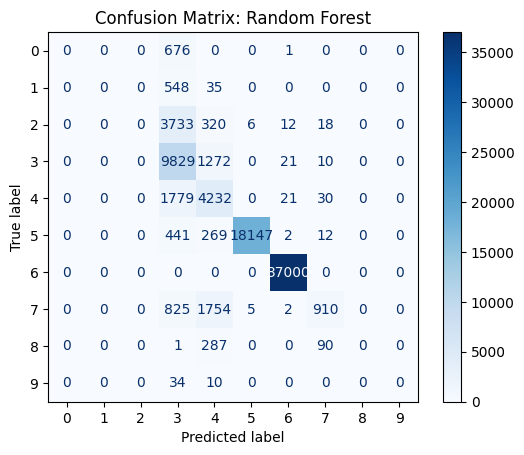

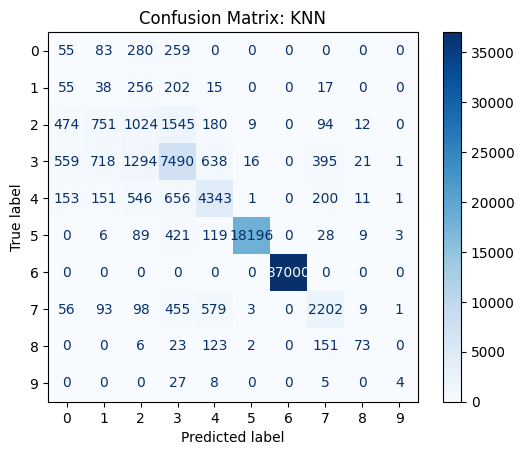

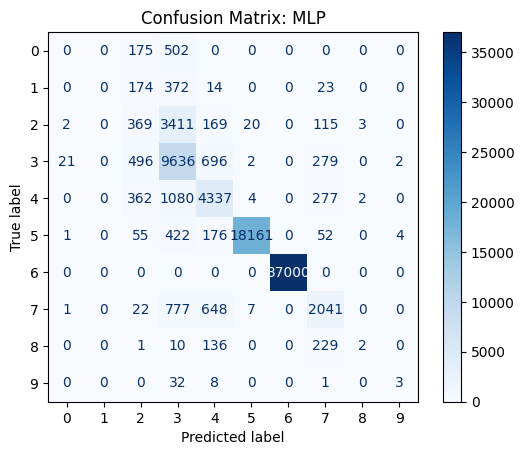

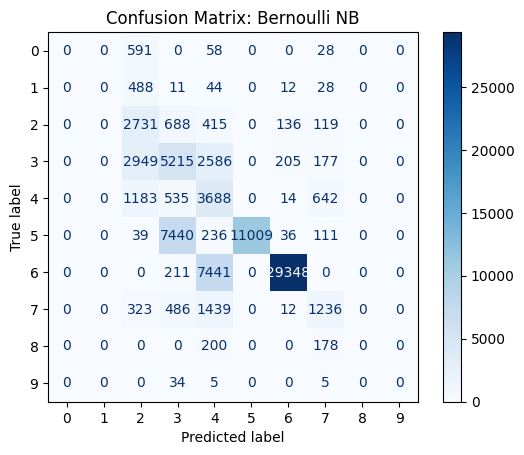

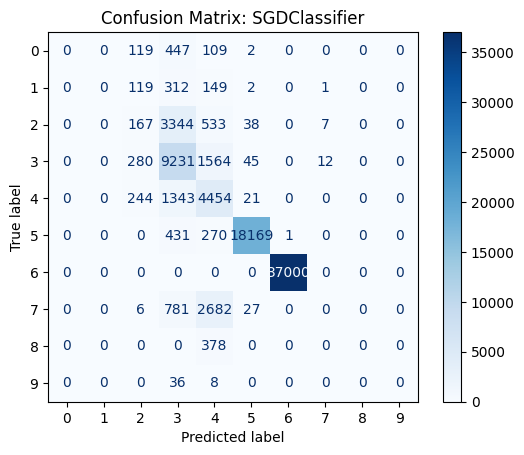

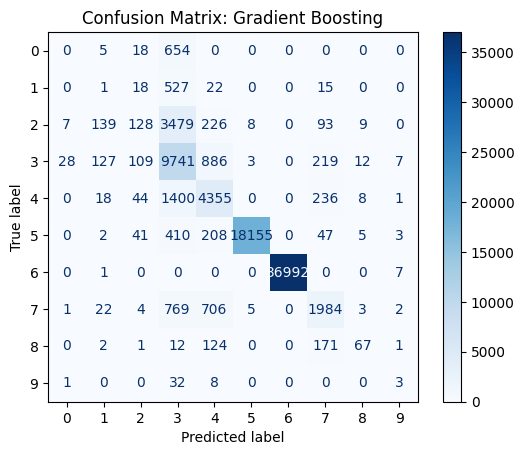

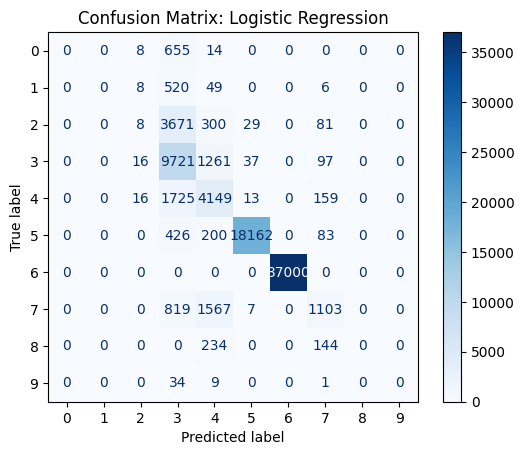

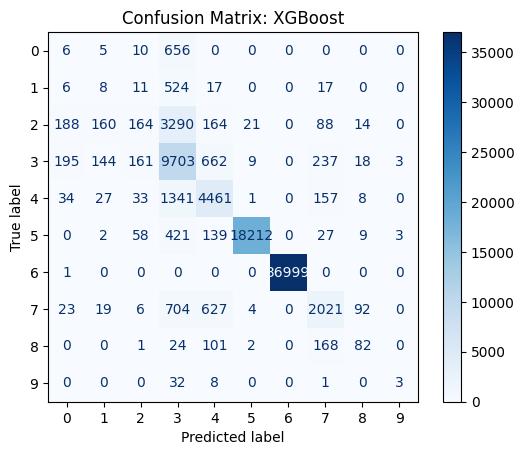

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 8
[LightGBM] [Info] Start training from score -4.473585
[LightGBM] [Info] Start training from score -4.609405
[LightGBM] [Info] Start training from score -2.660065
[LightGBM] [Info] Start training from score -1.658386
[LightGBM] [Info] Start training from score -2.266191
[LightGBM] [Info] Start training from score -1.477853
[LightGBM] [Info] Start training from score -1.141381
[LightGBM] [Info] Start training from score -2.816215
[LightGBM] [Info] Start training from score -5.041864
[LightGBM] [Info] Start training from score -7.206953


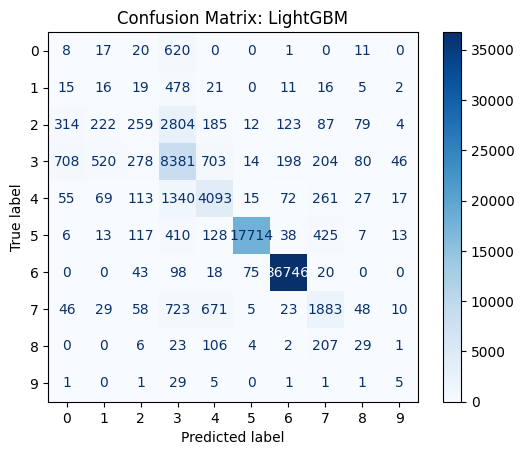

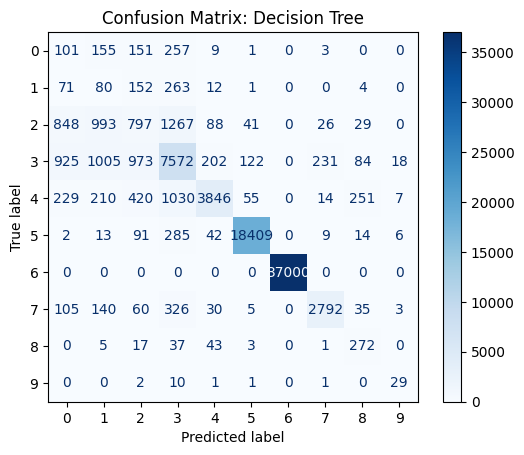

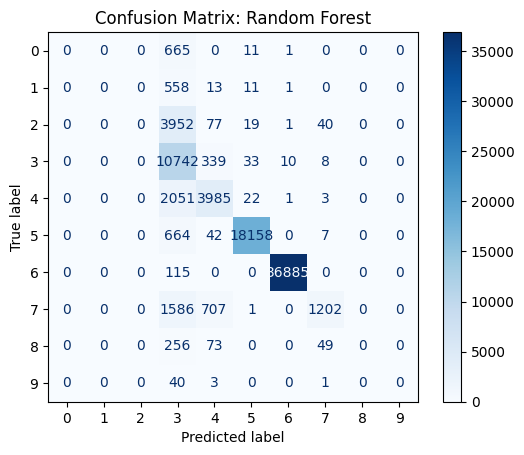

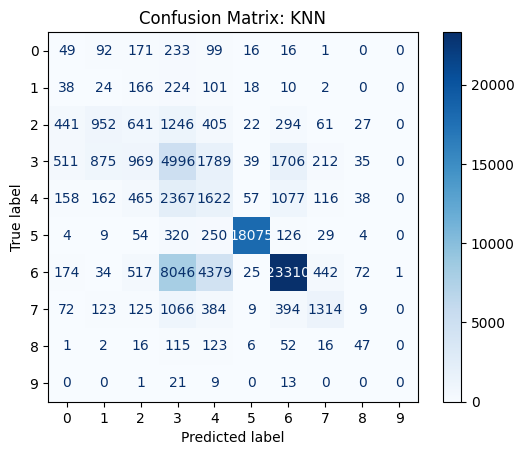

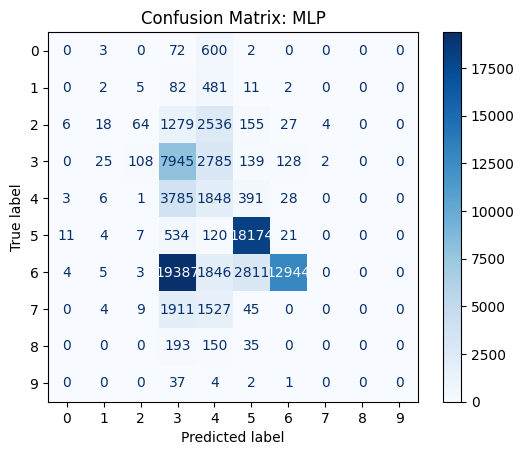

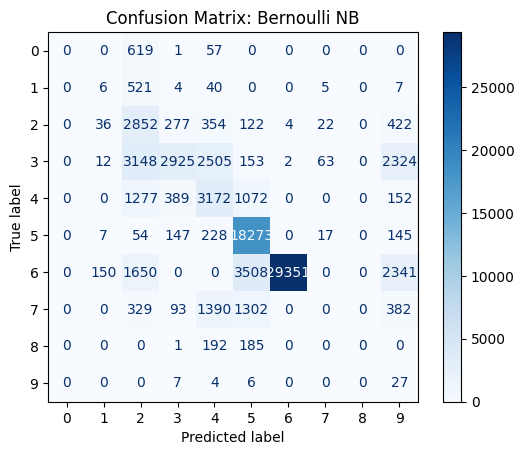

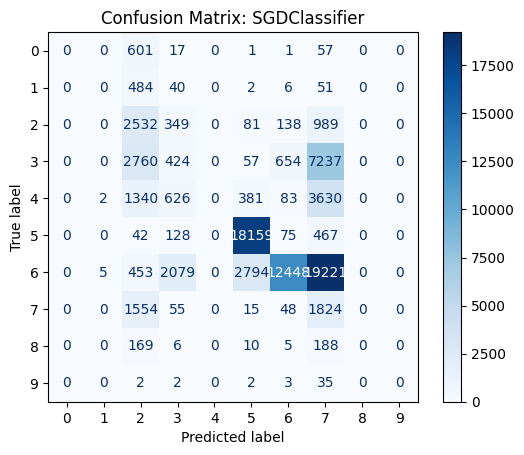

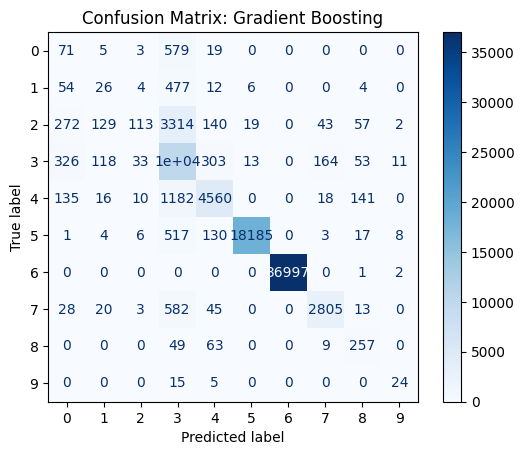

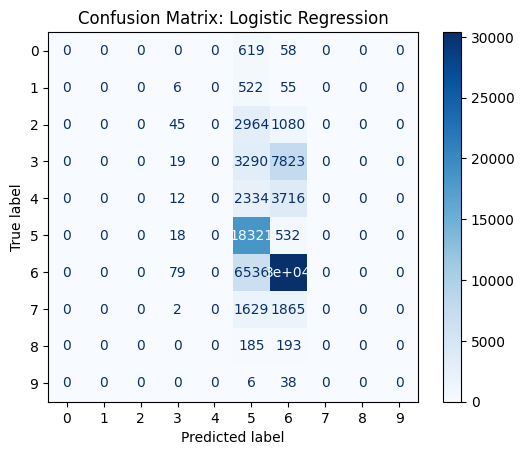

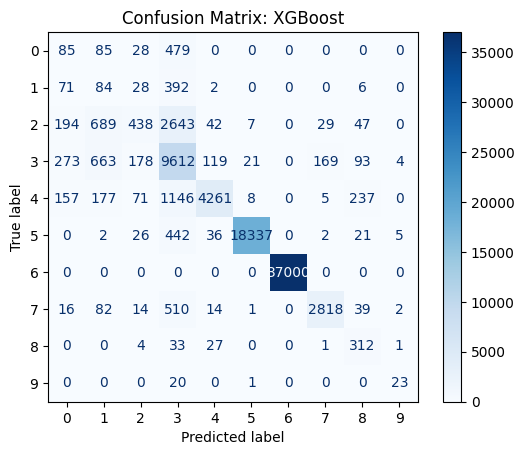

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5000
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 181
[LightGBM] [Info] Start training from score -4.473585
[LightGBM] [Info] Start training from score -4.609405
[LightGBM] [Info] Start training from score -2.660065
[LightGBM] [Info] Start training from score -1.658386
[LightGBM] [Info] Start training from score -2.266191
[LightGBM] [Info] Start training from score -1.477853
[LightGBM] [Info] Start training from score -1.141381
[LightGBM] [Info] Start training from score -2.816215
[LightGBM] [Info] Start training from score -5.041864
[LightGBM] [Info] Start training from score -7.206953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

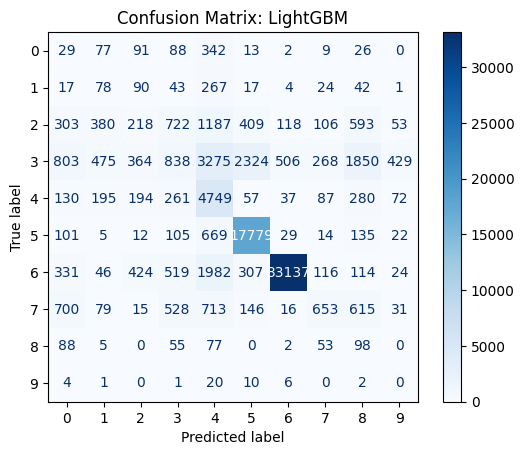

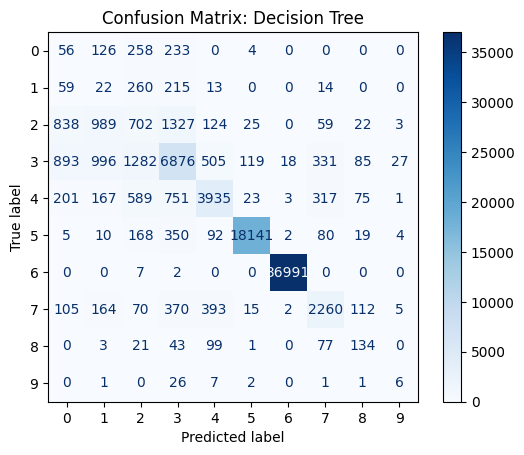

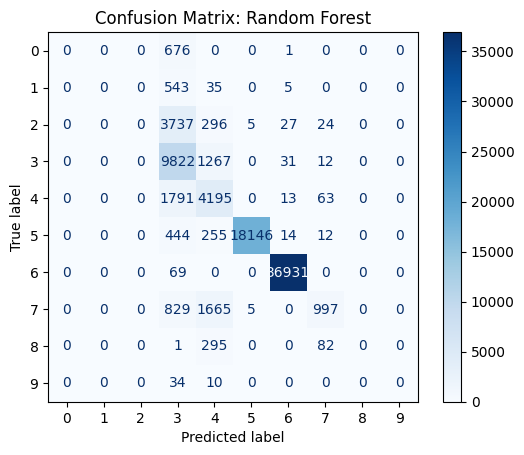

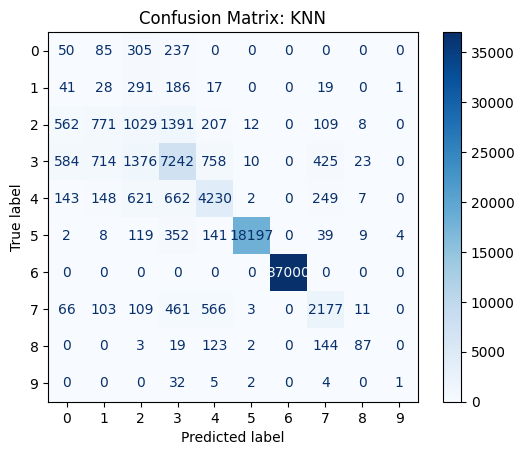

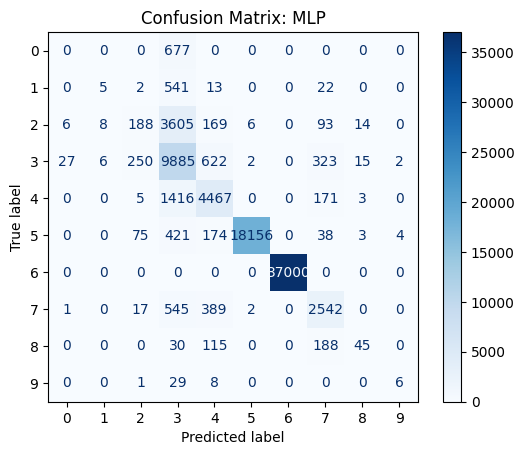

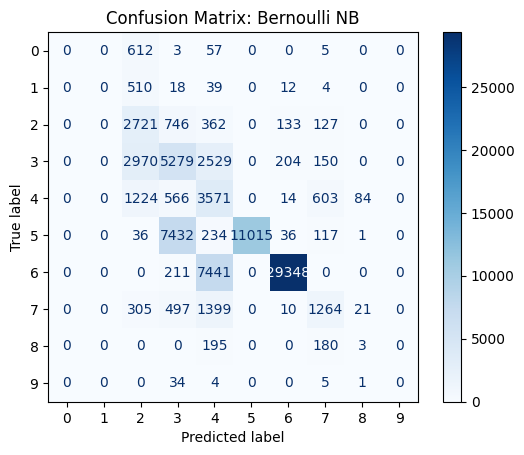

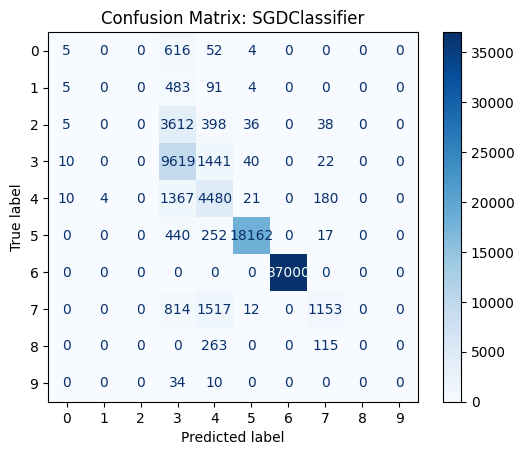

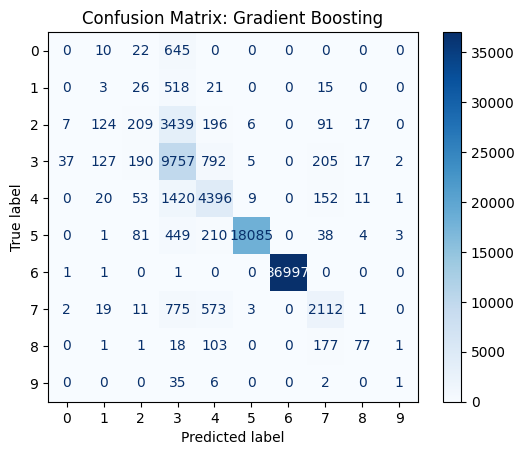

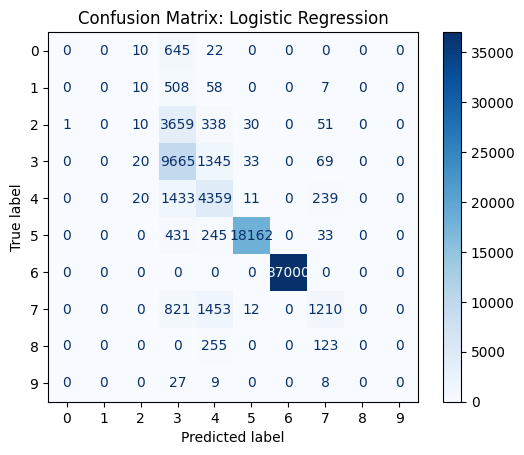

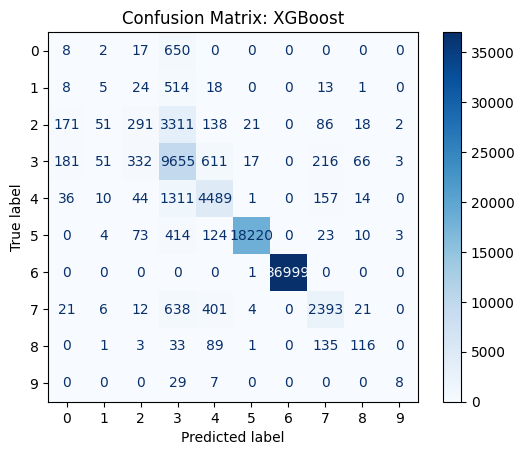

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 16
[LightGBM] [Info] Start training from score -4.473585
[LightGBM] [Info] Start training from score -4.609405
[LightGBM] [Info] Start training from score -2.660065
[LightGBM] [Info] Start training from score -1.658386
[LightGBM] [Info] Start training from score -2.266191
[LightGBM] [Info] Start training from score -1.477853
[LightGBM] [Info] Start training from score -1.141381
[LightGBM] [Info] Start training from score -2.816215
[LightGBM] [Info] Start training from score -5.041864
[LightGBM] [Info] Start training from score -7.206953


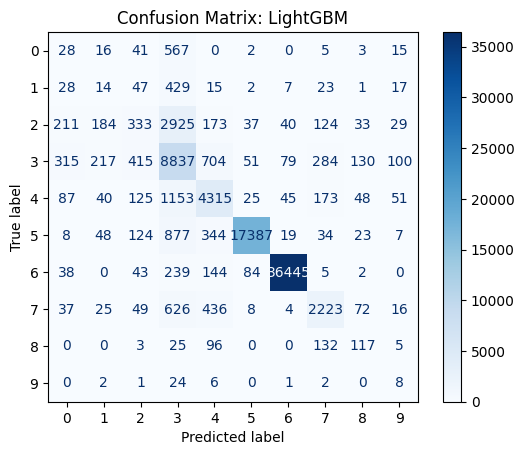

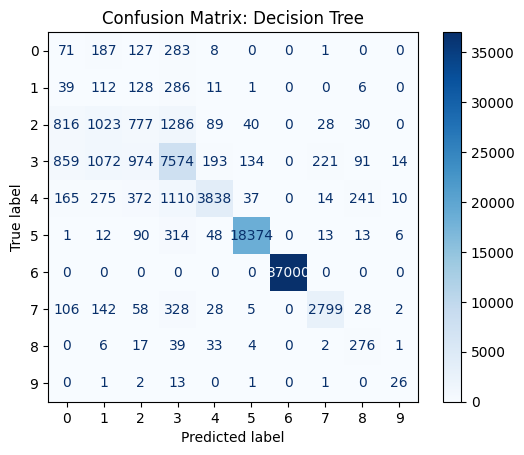

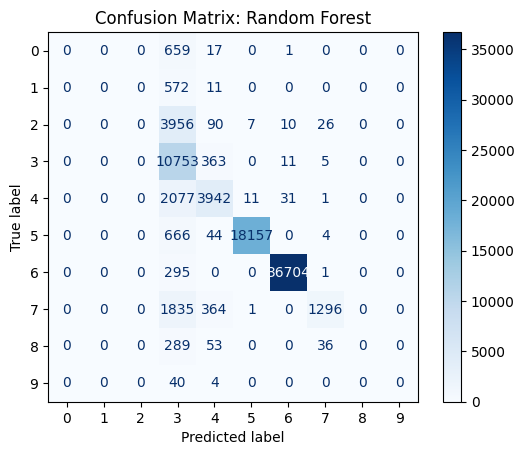

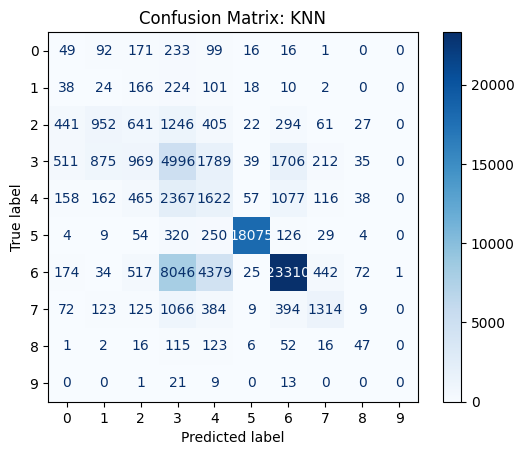

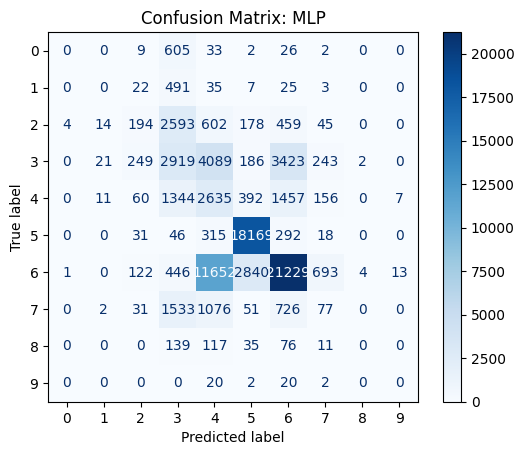

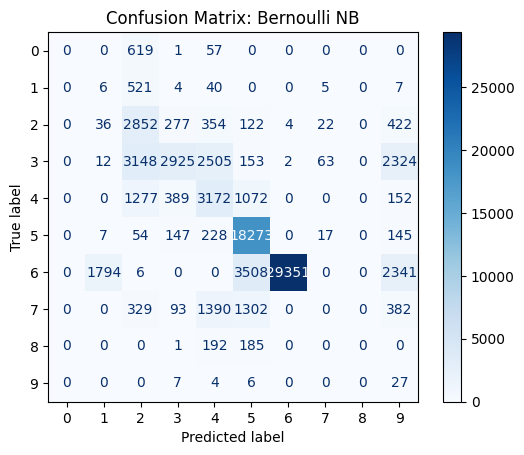

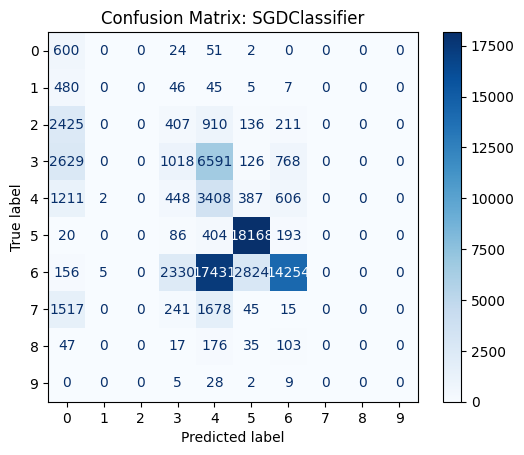

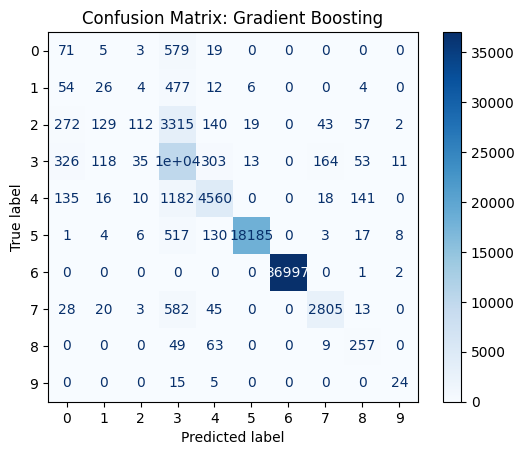

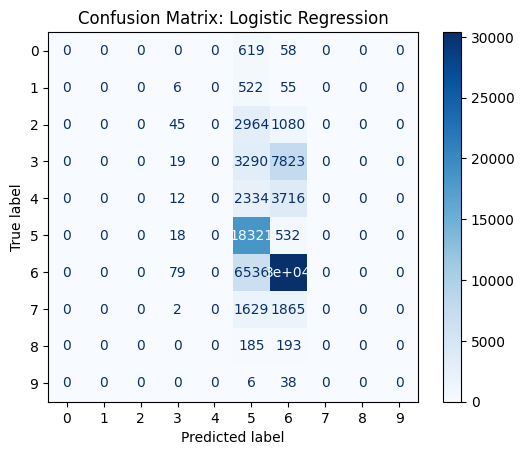

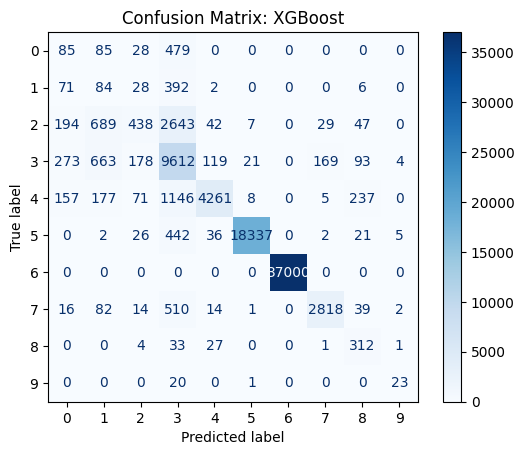

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5002
[LightGBM] [Info] Number of data points in the train set: 175341, number of used features: 182
[LightGBM] [Info] Start training from score -4.473585
[LightGBM] [Info] Start training from score -4.609405
[LightGBM] [Info] Start training from score -2.660065
[LightGBM] [Info] Start training from score -1.658386
[LightGBM] [Info] Start training from score -2.266191
[LightGBM] [Info] Start training from score -1.477853
[LightGBM] [Info] Start training from score -1.141381
[LightGBM] [Info] Start training from score -2.816215
[LightGBM] [Info] Start training from score -5.041864
[LightGBM] [Info] Start training from score -7.206953
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

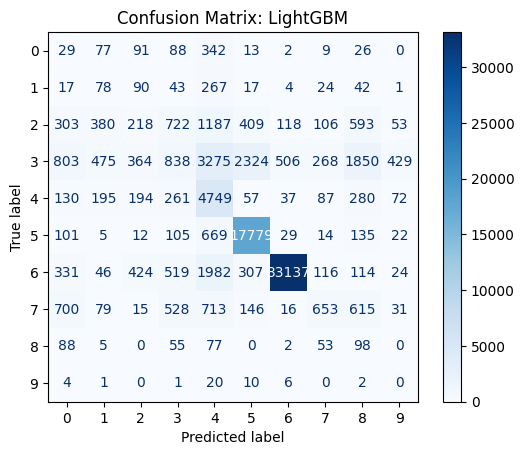

In [23]:
multi_results_pca_4 = train_and_evaluate(models, X_train_pca_4, train_multi["attack_cat"], X_test_pca_4, test_multi["attack_cat"], is_multiclass=True)
multi_results_corr_4 = train_and_evaluate(models, X_train_corr_4, train_multi["attack_cat"], X_test_corr_4, test_multi["attack_cat"], is_multiclass=True)

multi_results_pca_8 = train_and_evaluate(models, X_train_pca_8, train_multi["attack_cat"], X_test_pca_8, test_multi["attack_cat"], is_multiclass=True)
multi_results_corr_8 = train_and_evaluate(models, X_train_corr_8, train_multi["attack_cat"], X_test_corr_8, test_multi["attack_cat"], is_multiclass=True)

multi_results_pca_16 = train_and_evaluate(models, X_train_pca_16, train_multi["attack_cat"], X_test_pca_16, test_multi["attack_cat"], is_multiclass=True)
multi_results_corr_16 = train_and_evaluate(models, X_train_corr_16, train_multi["attack_cat"], X_test_corr_16, test_multi["attack_cat"], is_multiclass=True)

In [24]:
multi_results_pca_4

Precision    Recall        F1  Accuracy   ROC AUC  \
Decision Tree         0.844671  0.819523  0.831279  0.819523  0.919197   
Random Forest         0.815210  0.841143  0.817981  0.841143  0.980620   
KNN                   0.857734  0.843305  0.849596  0.843305  0.952049   
MLP                   0.842881  0.854868  0.831309  0.854868  0.983084   
Bernoulli NB          0.749880  0.629634  0.659449  0.629634  0.940366   
SGDClassifier         0.778604  0.814786  0.793029  0.814786       NaN   
Gradient Boosting     0.834844  0.856313  0.834779  0.856313  0.983880   
Logistic Regression   0.786747  0.839759  0.806130  0.839759  0.980067   
XGBoost               0.850538  0.861148  0.844041  0.861148  0.984925   
LightGBM              0.841203  0.855208  0.837662  0.855208  0.980096   

                     Training Time (s)  Inference Time (s)  
Decision Tree                 1.033227            0.006509  
Random Forest                18.010769            0.467430  
KNN                           0.111518            1.985560  
MLP                          78.747828            0.071246  
Bernoulli NB                  0.036511            0.005630  
SGDClassifier                 0.659211            0.010525  
Gradient Boosting           327.138794            0.469241  
Logistic Regression           3.147431            0.005463  
XGBoost                       3.081017            0.157750  
LightGBM                      1.729315            0.628851

In [25]:
multi_results_corr_4

Precision    Recall        F1  Accuracy   ROC AUC  \
Decision Tree         0.889822  0.860820  0.871967  0.860820  0.940455   
Random Forest         0.845365  0.860467  0.836720  0.860467  0.978155   
KNN                   0.701008  0.608245  0.641203  0.608245  0.837041   
MLP                   0.593862  0.553260  0.556015  0.553260  0.723026   
Bernoulli NB          0.767819  0.687533  0.698336  0.687533  0.940085   
SGDClassifier         0.534548  0.523490  0.523618  0.523490       NaN   
Gradient Boosting     0.897980  0.888427  0.874159  0.888427  0.989522   
Logistic Regression   0.428042  0.591811  0.482441  0.591811  0.659243   
XGBoost               0.903576  0.886290  0.882831  0.886290  0.990645   
LightGBM              0.724671  0.699351  0.692809  0.699351  0.833342   

                     Training Time (s)  Inference Time (s)  
Decision Tree                 2.664291            0.069296  
Random Forest                 9.111387            0.527935  
KNN                           0.161127           24.325717  
MLP                          49.872179            0.184548  
Bernoulli NB                  0.335540            0.158008  
SGDClassifier               245.605695            0.084558  
Gradient Boosting          1504.481913            3.751743  
Logistic Regression          12.112328            0.065519  
XGBoost                      13.574655            0.330288  
LightGBM                      6.726293            1.091015

In [26]:
multi_results_pca_8

Precision    Recall        F1  Accuracy   ROC AUC  \
Decision Tree         0.860715  0.832143  0.845435  0.832143  0.926485   
Random Forest         0.826347  0.851649  0.826044  0.851649  0.981141   
KNN                   0.870455  0.855378  0.862117  0.855378  0.954188   
MLP                   0.851340  0.869030  0.854457  0.869030  0.986261   
Bernoulli NB          0.774550  0.646492  0.682575  0.646492  0.944432   
SGDClassifier         0.796468  0.838325  0.809463  0.838325       NaN   
Gradient Boosting     0.855865  0.867536  0.849599  0.867536  0.985761   
Logistic Regression   0.826653  0.851953  0.827720  0.851953  0.981968   
XGBoost               0.861952  0.870366  0.855002  0.870366  0.986674   
LightGBM              0.838687  0.839698  0.833561  0.839698  0.962691   

                     Training Time (s)  Inference Time (s)  
Decision Tree                 3.996538            0.016244  
Random Forest                33.705793            0.893179  
KNN                           0.368397            4.373322  
MLP                         146.683611            0.115640  
Bernoulli NB                  0.091132            0.016251  
SGDClassifier                 1.981785            0.008051  
Gradient Boosting          1129.350730            0.792607  
Logistic Regression           5.236965            0.004731  
XGBoost                       4.807399            0.241673  
LightGBM                      3.947469            1.168622

In [27]:
multi_results_corr_8

Precision    Recall        F1  Accuracy   ROC AUC  \
Decision Tree         0.890771  0.861123  0.872850  0.861123  0.940847   
Random Forest         0.842591  0.862022  0.837446  0.862022  0.977831   
KNN                   0.701008  0.608245  0.641203  0.608245  0.837041   
MLP                   0.691995  0.497704  0.500026  0.497704  0.692024   
Bernoulli NB          0.765467  0.687533  0.695924  0.687533  0.940088   
SGDClassifier         0.639490  0.429809  0.457719  0.429809       NaN   
Gradient Boosting     0.898467  0.888464  0.874199  0.888464  0.989520   
Logistic Regression   0.428042  0.591811  0.482441  0.591811  0.659242   
XGBoost               0.903576  0.886290  0.882831  0.886290  0.990645   
LightGBM              0.724671  0.699351  0.692809  0.699351  0.833342   

                     Training Time (s)  Inference Time (s)  
Decision Tree                 4.917209            0.124251  
Random Forest                17.633129            0.919125  
KNN                           0.280324           46.813957  
MLP                         121.057168            0.295118  
Bernoulli NB                  0.491626            0.192136  
SGDClassifier               333.311493            0.076221  
Gradient Boosting          1750.268734            4.075068  
Logistic Regression          12.761810            0.075047  
XGBoost                      18.126745            0.384592  
LightGBM                      6.889490            1.114158

In [28]:
multi_results_pca_16

Precision    Recall        F1  Accuracy   ROC AUC  \
Decision Tree         0.865887  0.839564  0.851809  0.839564  0.930847   
Random Forest         0.825474  0.851321  0.826369  0.851321  0.982227   
KNN                   0.867950  0.850714  0.858600  0.850714  0.952416   
MLP                   0.865660  0.878079  0.859948  0.878079  0.987579   
Bernoulli NB          0.775429  0.646176  0.682962  0.646176  0.936965   
SGDClassifier         0.825778  0.855305  0.830930  0.855305       NaN   
Gradient Boosting     0.859603  0.870099  0.853977  0.870099  0.985949   
Logistic Regression   0.829876  0.855147  0.831222  0.855147  0.984781   
XGBoost               0.867764  0.876743  0.863132  0.876743  0.987373   
LightGBM              0.847732  0.846657  0.841298  0.846657  0.966916   

                     Training Time (s)  Inference Time (s)  
Decision Tree                10.421123            0.017764  
Random Forest                71.386814            0.856689  
KNN                           0.055095           14.299739  
MLP                         170.118224            0.117459  
Bernoulli NB                  0.121581            0.037892  
SGDClassifier                 2.972177            0.000000  
Gradient Boosting          2349.245133            0.831852  
Logistic Regression           6.029461            0.016548  
XGBoost                       6.143756            0.281877  
LightGBM                      5.035509            1.161761

In [29]:
multi_results_corr_16

Precision    Recall        F1  Accuracy   ROC AUC  \
Decision Tree         0.889972  0.860504  0.871936  0.860504  0.940028   
Random Forest         0.846064  0.860565  0.837678  0.860565  0.976391   
KNN                   0.701008  0.608245  0.641203  0.608245  0.837041   
MLP                   0.598973  0.549276  0.556338  0.549276  0.722675   
Bernoulli NB          0.767819  0.687533  0.698336  0.687533  0.940085   
SGDClassifier         0.626373  0.454841  0.478228  0.454841       NaN   
Gradient Boosting     0.897980  0.888427  0.874159  0.888427  0.989514   
Logistic Regression   0.428042  0.591811  0.482441  0.591811  0.659243   
XGBoost               0.903576  0.886290  0.882831  0.886290  0.990645   
LightGBM              0.724671  0.699351  0.692809  0.699351  0.833342   

                     Training Time (s)  Inference Time (s)  
Decision Tree                 5.315310            0.131408  
Random Forest                18.613018            0.977327  
KNN                           0.260746           44.202267  
MLP                         112.851105            0.257114  
Bernoulli NB                  0.488563            0.212899  
SGDClassifier               359.940674            0.082269  
Gradient Boosting          1704.160296            3.831067  
Logistic Regression          12.474522            0.065903  
XGBoost                      13.180279            0.335143  
LightGBM                      6.523168            1.165679

In general, the Decision Tree consistently achieved the best performance across all thresholds in both feature extraction and feature selection. However, this outcome does not align with the results reported in the research paper, where the MLP model was dominant in all aspects. Interestingly, in this analysis, the MLP model delivered the poorest results, presenting a stark contrast to the research findings.